# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data
import pandas as pd
# read the data using the pandas dataframe 
data = pd.read_csv('/content/drive/MyDrive/DS/stock_data.csv')


Mounted at /content/drive


In [3]:
# Create copy of dataframe training  to avoid any changes to original dataframe

df = data.copy()

In [4]:
# returns the first 5 rows of the train data
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [5]:
# return the shape of the train data set
df.shape

(340, 15)

####Observation

1. It is observed that dataset has 340 rows and 15 columns.

In [6]:
# Checking the data types of the columns for the train dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Observations:

1.   info() returns pandas dataframe and has total of 15 columns .
2.   It is observed 7 column(s) are with float64 datatype, 4 column(s) 
     with int64 datatype and 4 column(s) with object datatype.
3.   In total, info() uses memory usage of 40.0+ KB.
4.   There are 4 columns (Column, Non-Null, Count, Dtype) with 15 rows.

In [7]:
# Statistical summary of the train dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


####Observations

1. It is observed that for current price column the data distribution is postively skewed.
2. It is observed that for Volatility Column the distribution is almost symmetrical as the mean and median are close to each other.
3. It is observed that ROE column the distribution is positively skewed as the mean is higher than the mdeian.
4. It is observed that Cash ratio column the distribution is postively skewed as the data for the mean is higher than the mdeidan.
5. It is observed that  Estimated Shares Outstanding, P/E Ratio are postively skewed. 
6. It is observed that Earnings Per Share is almost symetrically skewed.
7. It is observed that as standard deviation is higher for the ROE column, data observations are more scattered from the mean .


In [8]:

# Check the NULL values in the train dataframe

print (df.isnull().sum())

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


####Observations####

1.   It is observed that no columns have NULL values in train dataset.

In [9]:
# Find the duplicate rows in the train data set

dups = df[df.duplicated()]

if dups.empty:
  print ("No duplicates found in the Dataset")
else:
  print (dups)

No duplicates found in the Dataset


In [10]:
# convert all columns with dtype object into category
for col in df.columns[df.dtypes=='object']:
    df[col] = df[col].astype('category')

####Observation

1.  It is observed that dataset has no missing or duplicate values.
2.  It is observed that all columns with dtype object should be dtype category in order to preserve memory during execution.

In [11]:
# To check if all the coluns with object datatype are converted to category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS Sector                   340 non-null    category
 3   GICS Sub Industry             340 non-null    category
 4   Current Price                 340 non-null    float64 
 5   Price Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash Ratio                    340 non-null    int64   
 9   Net Cash Flow                 340 non-null    int64   
 10  Net Income                    340 non-null    int64   
 11  Earnings Per Share            340 non-null    float64 
 12  Estimated Shares Outstanding  340 non-null    floa

In [12]:
#provide statistical summary of all categorical columns
df.describe(include='category').T

,count,unique,top,freq
Ticker Symbol,340,340,AAL,1
Security,340,340,3M Company,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

# Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="viridis",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

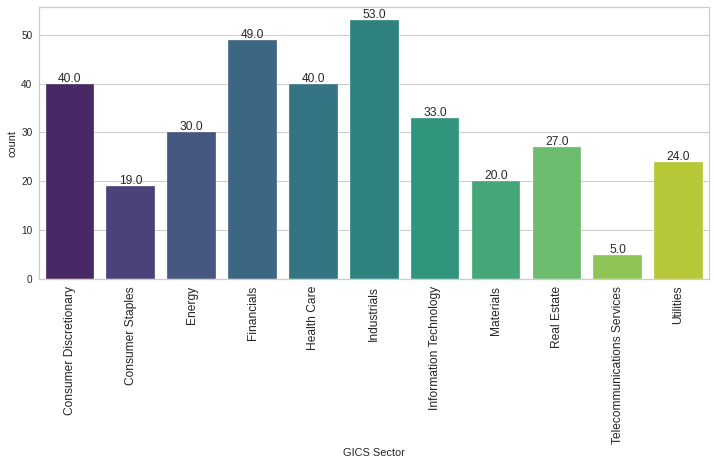

In [15]:
#create labeled barplot of stocks by sector
labeled_barplot(df, 'GICS Sector')

In [16]:
df['GICS Sector'].value_counts().head(5)

Industrials               53
Financials                49
Consumer Discretionary    40
Health Care               40
Information Technology    33
Name: GICS Sector, dtype: int64

####Observation

1. It is observed that from the bargraph and dataframe  Industries, Financial,Consumer , Health Care and Information Technology are the five sectors with high number of stocks.

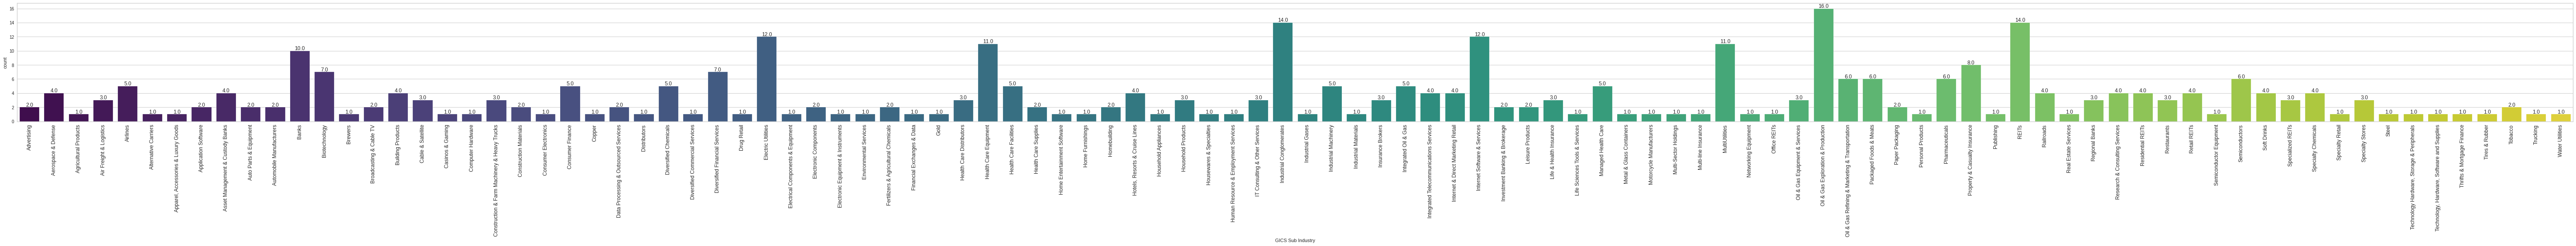

In [17]:
#create labeled barplot of stocks by GICS sub industry
labeled_barplot(df, 'GICS Sub Industry')

In [18]:
df['GICS Sub Industry'].value_counts().head(10)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
MultiUtilities                        11
Health Care Equipment                 11
Banks                                 10
Property & Casualty Insurance          8
Diversified Financial Services         7
Name: GICS Sub Industry, dtype: int64

####Observation

1. It is observed that above are the top 10 sub industry with the most number of stocks.

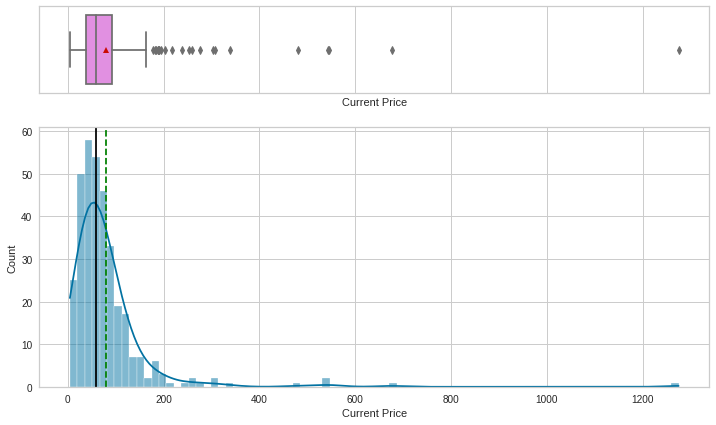

In [19]:
# Below Histplot and boxplot show the data for the Current Price column.

histogram_boxplot(df, "Current Price", kde=True)

####Observations

1. It is observed that average most of the current price for the stocks are between 0 and 200 .
2. It is observed that few of the stocks have higher price and outliers, looks like the distribution is positively skewed.

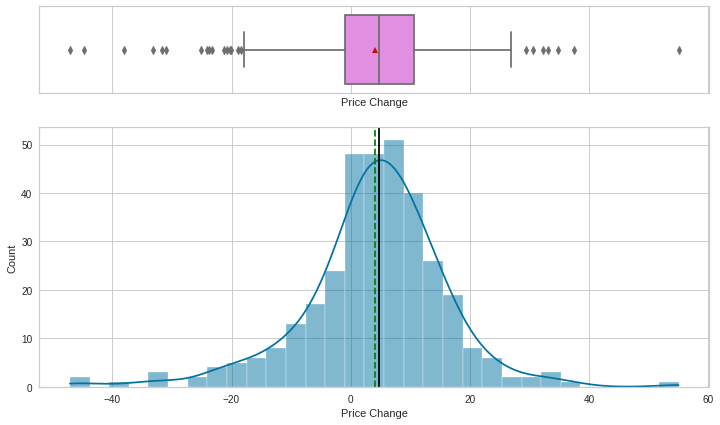

In [20]:
# Below Histplot and boxplot show the data for the Price Change column.

histogram_boxplot(df, "Price Change", kde=True)

####Observation

1. It is observed that the Price change across stocks is almost normally distributed.

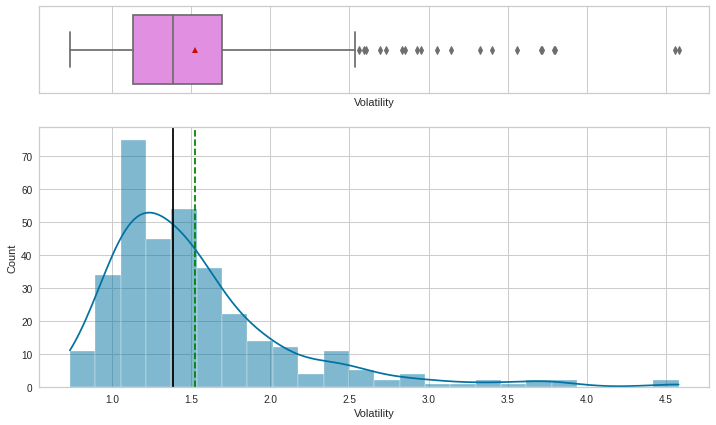

In [21]:
# Below Histplot and boxplot show the data for the Volatility column.

histogram_boxplot(df, "Volatility", kde=True)

####Observations

1. It is observed that Volitality in the stocks for the past few weeks has been high and the distribution is positively skewed.
2. It is observed that  high number of outliers are in the distribution.

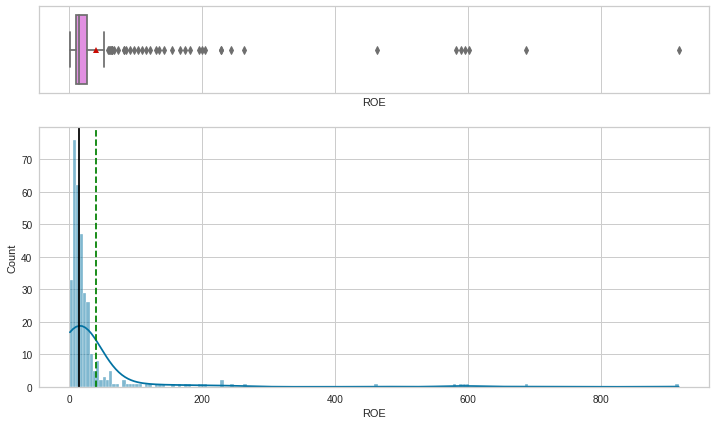

In [24]:
# Below Histplot and boxplot show the data for the ROE column.

histogram_boxplot(df, "ROE", kde=True)

####Observation

1. It is observed that ROE of the stocks from different companies is between 0 and 150 .
2. It is observed that the distribution is positively skewed.

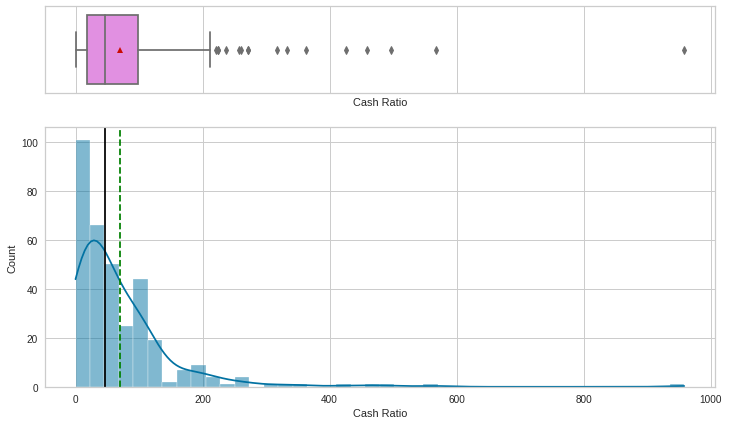

In [25]:

# Below Histplot and boxplot show the data for the Cash Ratio column.

histogram_boxplot(df, "Cash Ratio", kde=True)

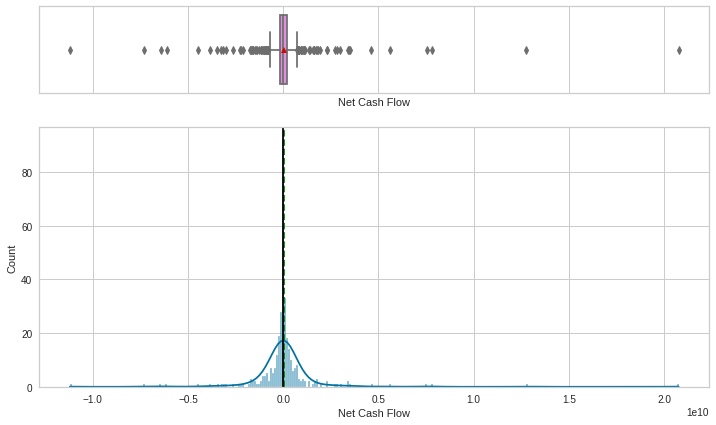

In [26]:
# Below Histplot and boxplot show the data for the Net Cash Flow column.

histogram_boxplot(df, "Net Cash Flow", kde=True)

####Observations

1. It is observed that net cash Flow of the stocks for companies is normally distributed.
2. It is obsereved that outliers are observed during the sameand the average net cash flow is 0.

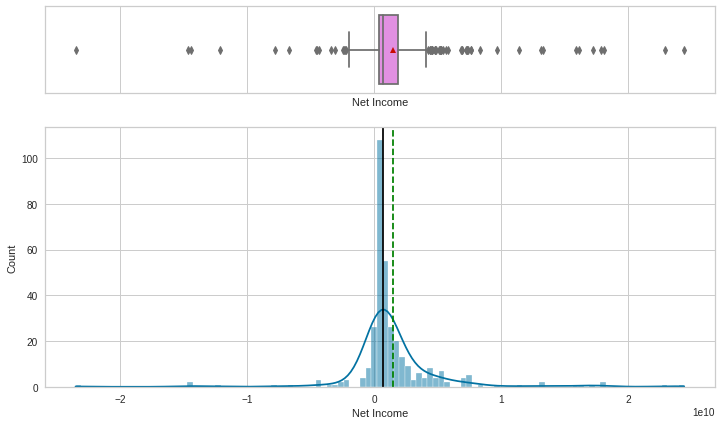

In [27]:
# Below Histplot and boxplot show the data for the Net Income column.

histogram_boxplot(df, "Net Income", kde=True)

####Observations

1. It is observed that , net income is shown to be right skewed with both long positive and negative tails most companies generate good profits, but some are failing and some are highly successful.

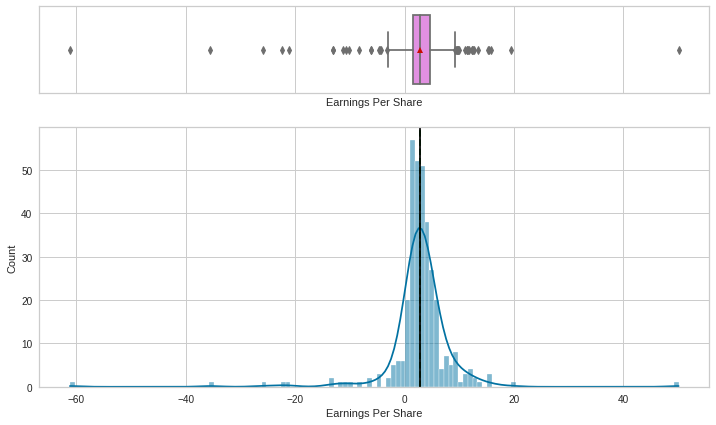

In [28]:
# Below Histplot and boxplot show the data for the Earnings Per Share column.

histogram_boxplot(df, "Earnings Per Share", kde=True)

####Observation

1. It is observed that   companies have negative earning per share and companies also have postivie earning per share.
2. It is observed that distribution is normally symmetric.

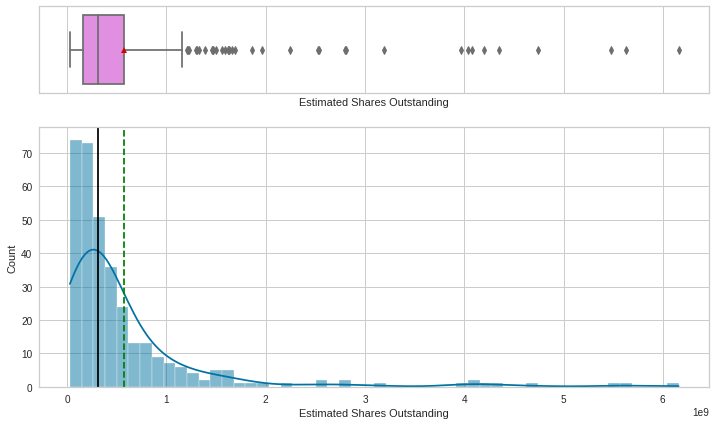

In [29]:
# Below Histplot and boxplot show the data for the Estimated Shares Outstanding column.

histogram_boxplot(df, "Estimated Shares Outstanding", kde=True)

####Observation

1. It is observed that  distribution is highly right skewed and good amount of outliers are present in the distribution.

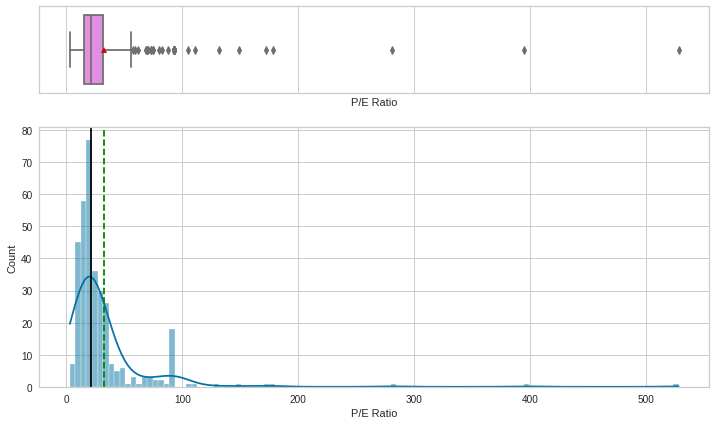

In [30]:
# Below Histplot and boxplot show the data for the P/E Ratio column.

histogram_boxplot(df, "P/E Ratio", kde=True)

####Observation

1. It is observed that very few stock shows a negative ratio, even though several stocks have a negative EPS and very less stock  has a price listed of less than 0.

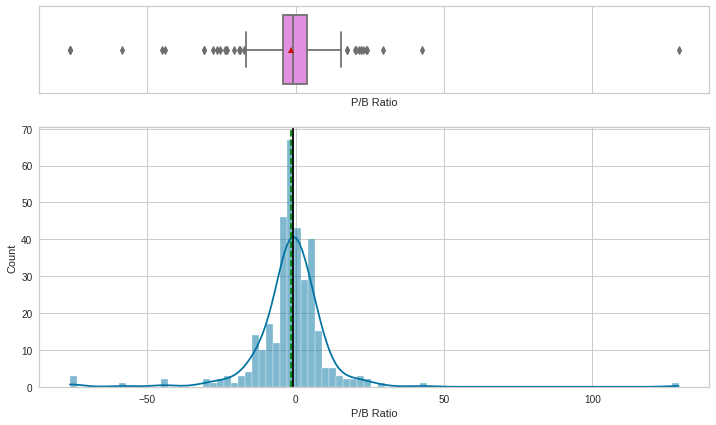

In [31]:
# Below Histplot and boxplot show the data for the P/B Ratio column.

histogram_boxplot(df, "P/B Ratio", kde=True)

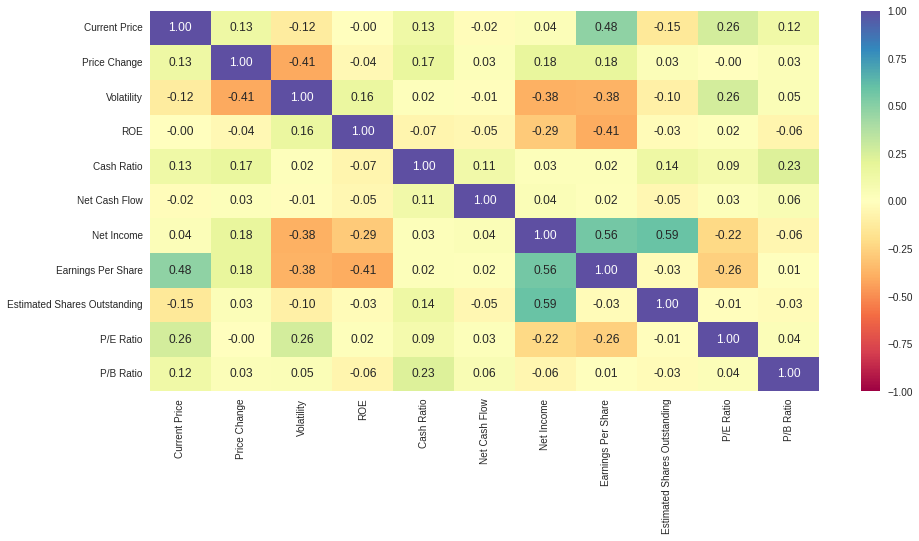

In [32]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

####Observations

1. It is observed that Volatility is negatively correlated with price change, i.e., as a stock becomes more volatile, its price is likely dropping
2. It is observed that Net income is negatively correlayed with volatility, i.e. as a company generates higher net income its price is likely less volatile
3. It is observed that Earnings Per share is positively correlated with Current Price , i.e as the Earnings Per share increases the Current Price also increase.
4. It is observed that Estimated Shares outstanding is postively correlated with Net income , i.e as the Net income increases the total market value of the comapny increases .

# 1. What does the distribution of stock prices look like?

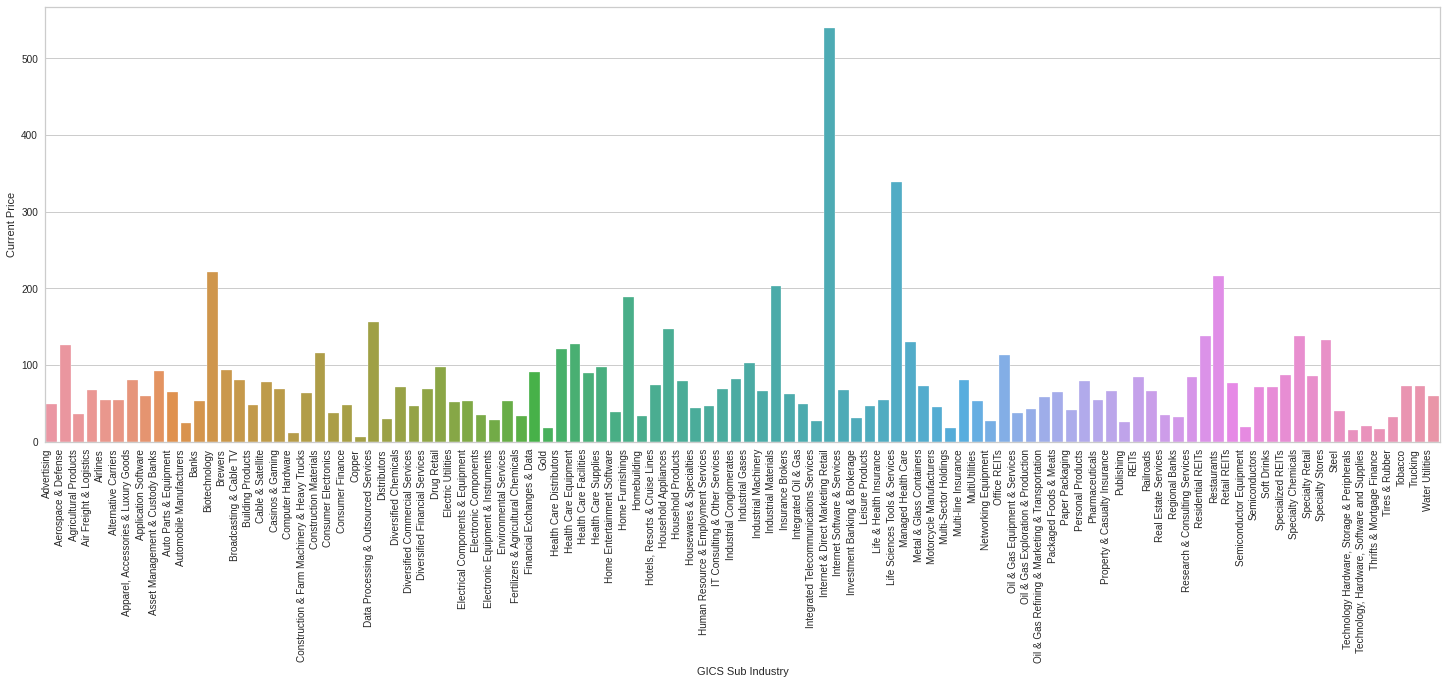

In [33]:
# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(25,8))
sns.barplot(data=df, x='GICS Sub Industry', y='Current Price', ci=False)  
plt.xticks(rotation= 90, ha='right');
plt.show()

####Observation

1. It is observed that BioTechnology, Health Care, Information Technology and retail are performing good with the current stock price .

# The stocks of which economic sector have seen the maximum price increase on average?

                    GICS Sector  Avgs Price Change
4                   Health Care           9.585652
1              Consumer Staples           8.684750
6        Information Technology           7.217476
9   Telecommunications Services           6.956980
8                   Real Estate           6.205548
0        Consumer Discretionary           5.846093
7                     Materials           5.589738
3                    Financials           3.865406
5                   Industrials           2.833127
10                    Utilities           0.803657
2                        Energy         -10.228289


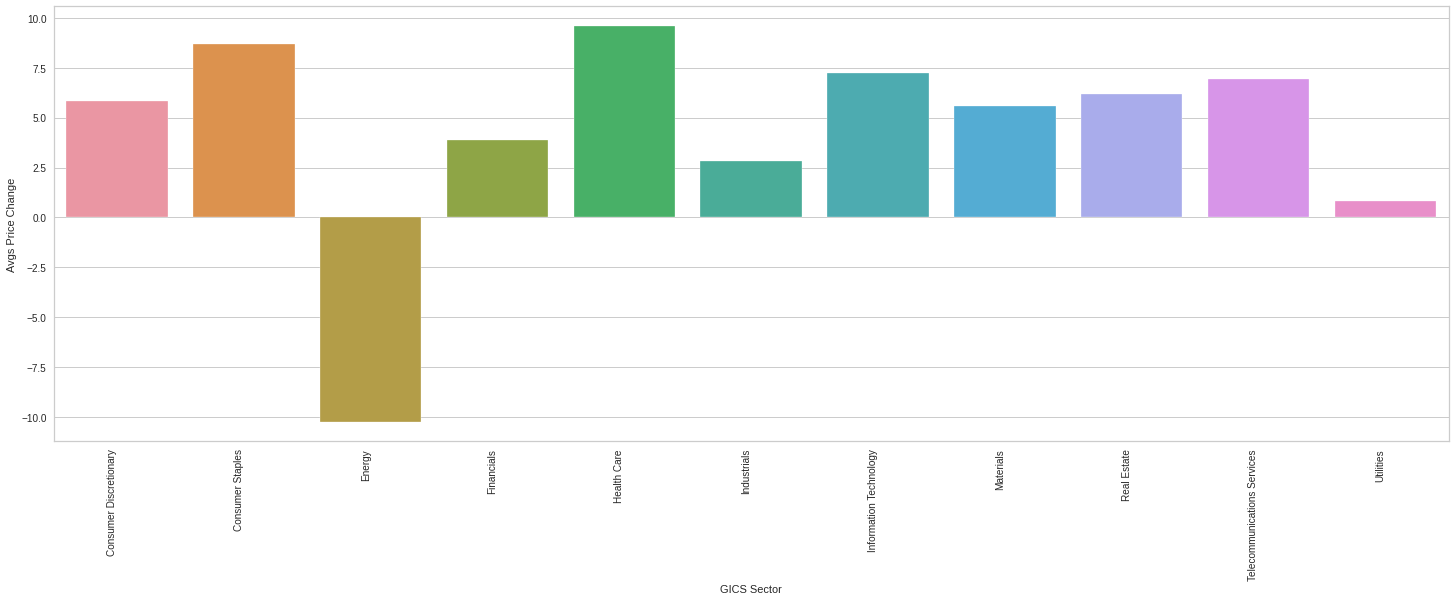

In [34]:
# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(25,8))

# Below dataframe is to group by the values and reset the index
df_ecnmcsctr_avgs_price = df.groupby('GICS Sector')['Price Change'].mean().reset_index().sort_values(by=['Price Change'], ascending=False)

# Below is to rename the columns from the dataframe newly created
df_ecnmcsctr_avgs_price.columns=['GICS Sector', 'Avgs Price Change']
print (df_ecnmcsctr_avgs_price)

# Below Barplot is used to show the values by GICS Sector and the price change
sns.barplot(data=df_ecnmcsctr_avgs_price, x='GICS Sector', y='Avgs Price Change', ci=False) 
plt.xticks(rotation= 90, ha='right');
plt.show()

####Observation

1. It is observed that Energy is performing in negative with the average price change and other GICS Sector are performing high espicially health care, customer staples and Information Technology. 

# How are the different variables correlated with each other?

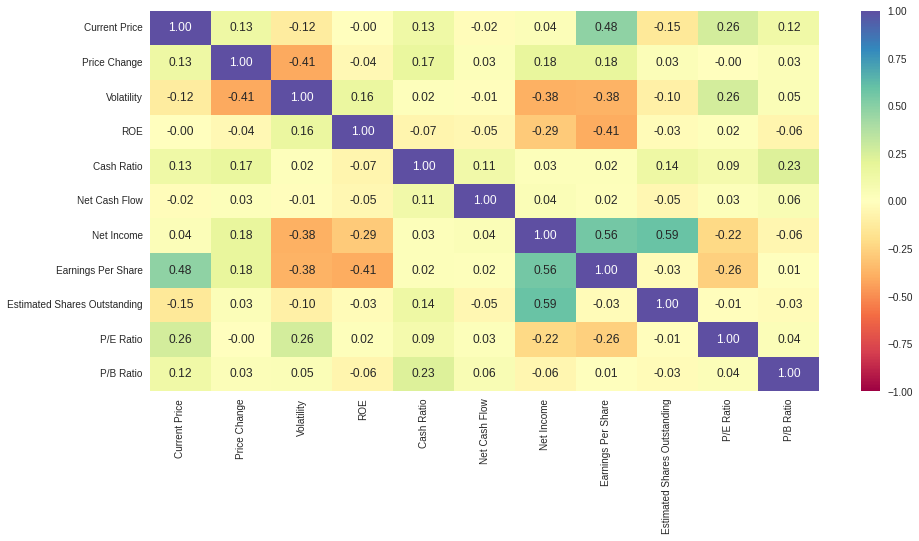

In [35]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

####Observations

1. It is observed that Volatility is negatively correlated with price change, i.e., as a stock becomes more volatile, its price is likely dropping
2. It is observed that Net income is negatively correlayed with volatility, i.e. as a company generates higher net income its price is likely less volatile
3. It is observed that Earnings Per share is positively correlated with Current Price , i.e as the Earnings Per share increases the Current Price also increase.
4. It is observed that Estimated Shares outstanding is postively correlated with Net income , i.e as the Net income increases the total market value of the comapny increases .

# Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

                    GICS Sector  Avgs Cash Ratio Value
6        Information Technology             149.818182
9   Telecommunications Services             117.000000
4                   Health Care             103.775000
3                    Financials              98.591837
1              Consumer Staples              70.947368
2                        Energy              51.133333
8                   Real Estate              50.111111
0        Consumer Discretionary              49.575000
7                     Materials              41.700000
5                   Industrials              36.188679
10                    Utilities              13.625000


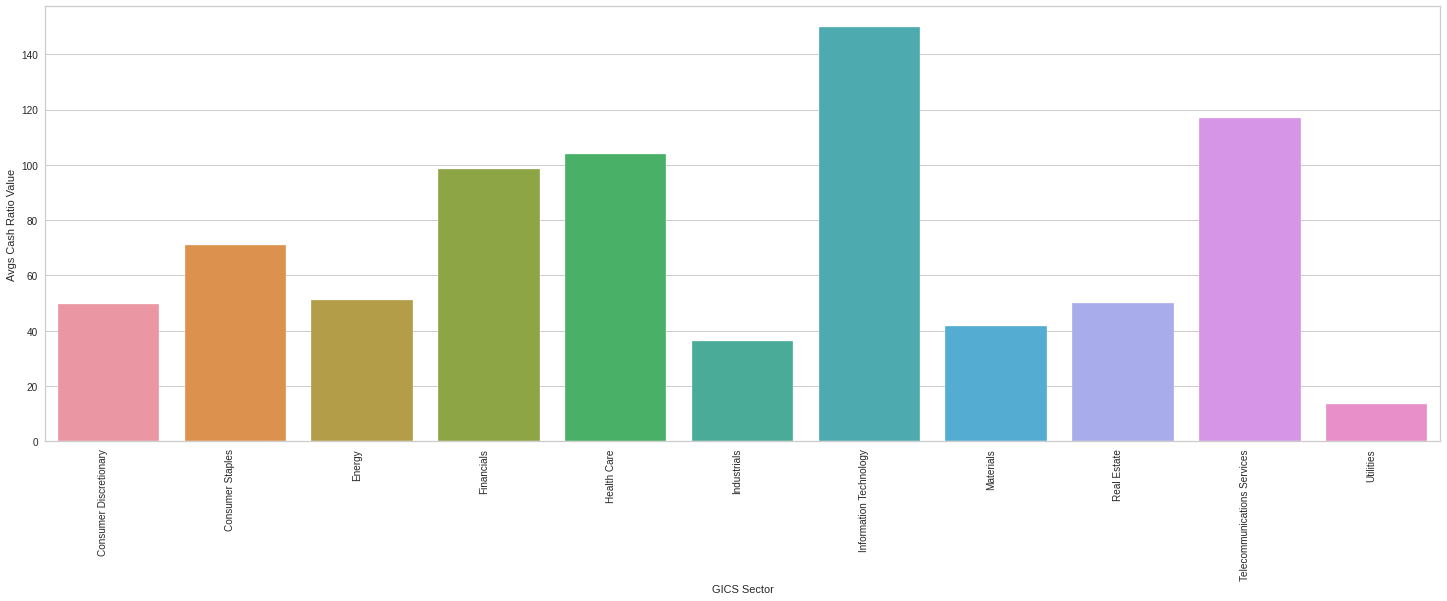

In [36]:
# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(25,8))

# Below dataframe is to group by the values and reset the index
df_ecnmcsctr_avgs_cashratio = df.groupby('GICS Sector')['Cash Ratio'].mean().reset_index().sort_values(by=['Cash Ratio'], ascending=False)

# Below is to rename the columns from the dataframe newly created
df_ecnmcsctr_avgs_cashratio.columns=['GICS Sector', 'Avgs Cash Ratio Value']
print (df_ecnmcsctr_avgs_cashratio)

# Below Barplot is used to show the values by GICS Sector and the price change
sns.barplot(data=df_ecnmcsctr_avgs_cashratio, x='GICS Sector', y='Avgs Cash Ratio Value', ci=False) 
plt.xticks(rotation= 90, ha='right');
plt.show()

####Observation 

1. It is observed that Information Technology, Telecommunication services , Healthcare, Financials and customer stapes are performing in the Top 5 with mean of the cash ratio values into consideration.

# P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

                    GICS Sector  Avgs P/E Ratio Value
2                        Energy             72.897709
6        Information Technology             43.782546
8                   Real Estate             43.065585
4                   Health Care             41.135272
0        Consumer Discretionary             35.211613
1              Consumer Staples             25.521195
7                     Materials             24.585352
10                    Utilities             18.719412
5                   Industrials             18.259380
3                    Financials             16.023151
9   Telecommunications Services             12.222578


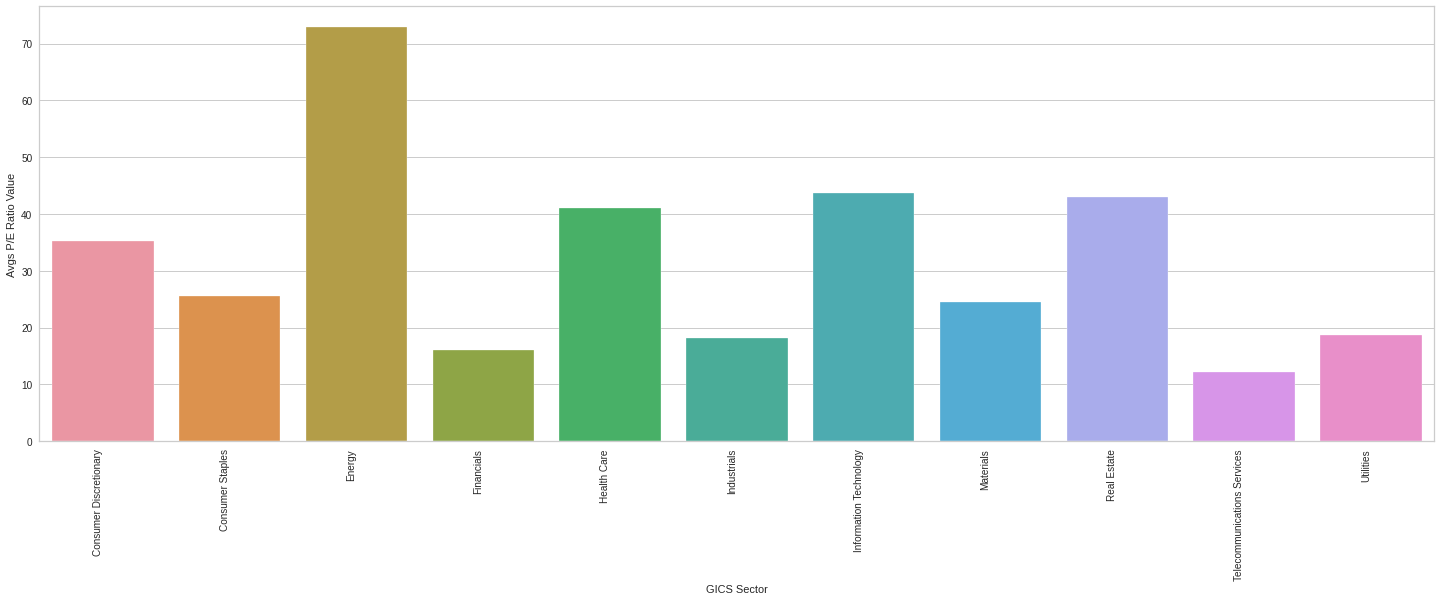

In [37]:
# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(25,8))

# Below dataframe is to group by the values and reset the index
df_ecnmcsctr_avgs_peratio = df.groupby('GICS Sector')['P/E Ratio'].mean().reset_index().sort_values(by=['P/E Ratio'], ascending=False)

# Below is to rename the columns from the dataframe newly created
df_ecnmcsctr_avgs_peratio.columns=['GICS Sector', 'Avgs P/E Ratio Value']
print (df_ecnmcsctr_avgs_peratio)

# Below Barplot is used to show the values by GICS Sector and the price change
sns.barplot(data=df_ecnmcsctr_avgs_peratio, x='GICS Sector', y='Avgs P/E Ratio Value', ci=False) 
plt.xticks(rotation= 90, ha='right');
plt.show()

####Observation 

1. It is observed that Energy, Information Technology , Real Estate, Healthcare, consumer Discretionary are performing in the Top 5 with mean of the P/E ratio values into consideration.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

# Duplicate  Check

In [38]:
# Find the duplicate rows in the train data set

dups = df[df.duplicated()]

if dups.empty:
  print ("No duplicates found in the Dataset")
else:
  print (dups)

No duplicates found in the Dataset


# Missing value treatment

In [39]:
# Check the NULL values in the train dataframe

print (df.isnull().sum())

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64


####Observation

1. It is observed that no null values are in the dataset.

# Outlier Check

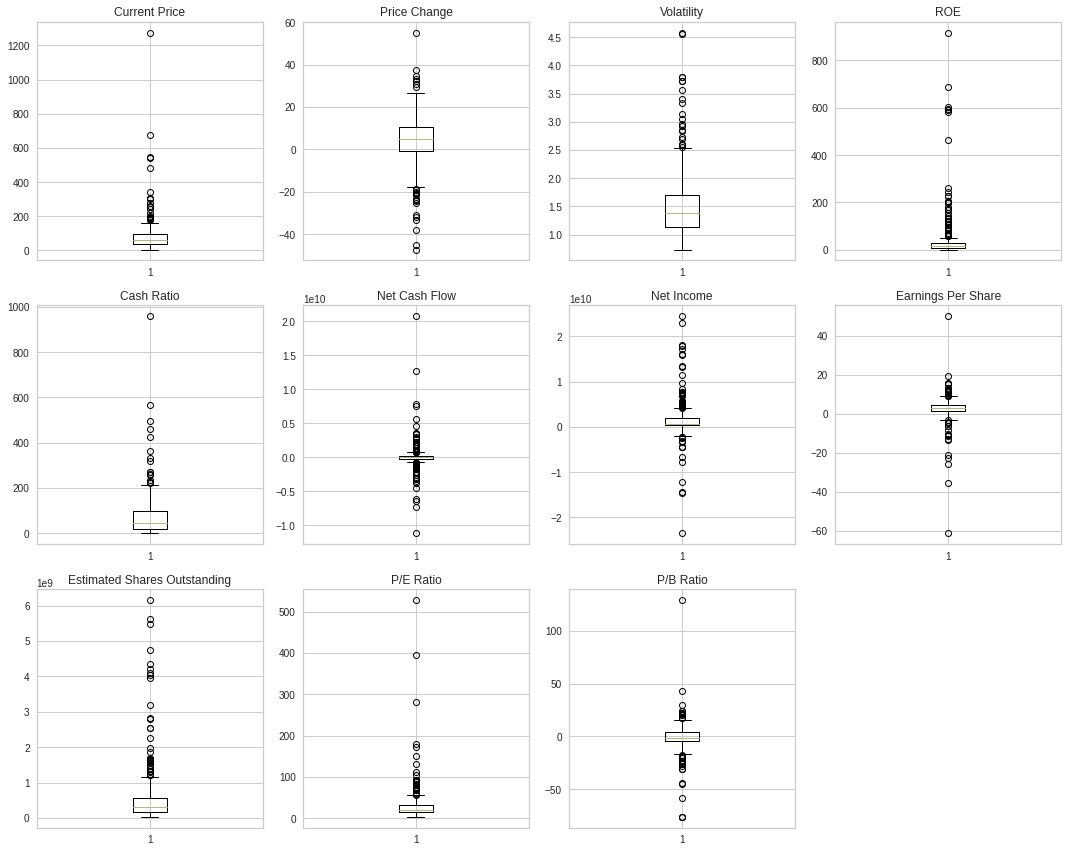

In [40]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## EDA

- It is a good idea to explore the data once again after manipulating it.

# What does the distribution of stock prices look like?

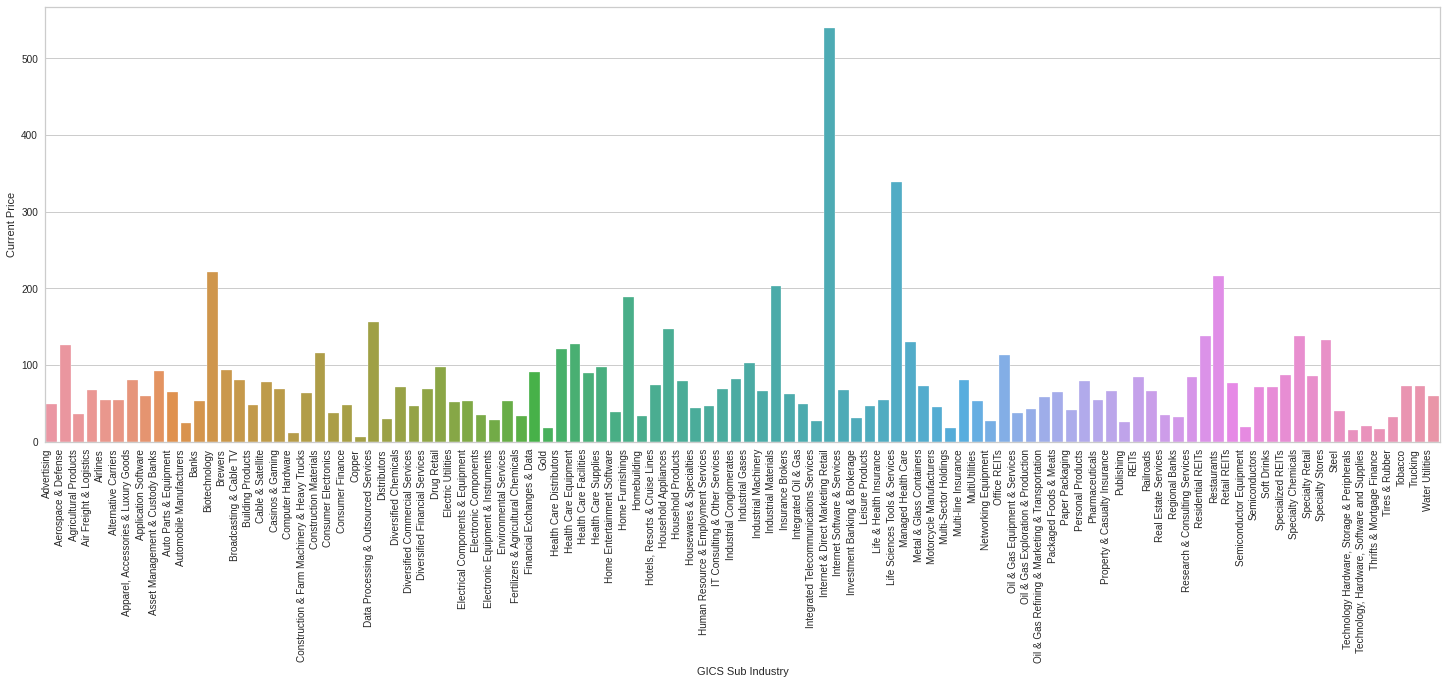

In [41]:
# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(25,8))
sns.barplot(data=df, x='GICS Sub Industry', y='Current Price', ci=False)  
plt.xticks(rotation= 90, ha='right');
plt.show()

####Observation

1. It is observed that BioTechnology, Health Care, Information Technology and retail are performing good with the current stock price .

# The stocks of which economic sector have seen the maximum price increase on average?

                    GICS Sector  Avgs Price Change
4                   Health Care           9.585652
1              Consumer Staples           8.684750
6        Information Technology           7.217476
9   Telecommunications Services           6.956980
8                   Real Estate           6.205548
0        Consumer Discretionary           5.846093
7                     Materials           5.589738
3                    Financials           3.865406
5                   Industrials           2.833127
10                    Utilities           0.803657
2                        Energy         -10.228289


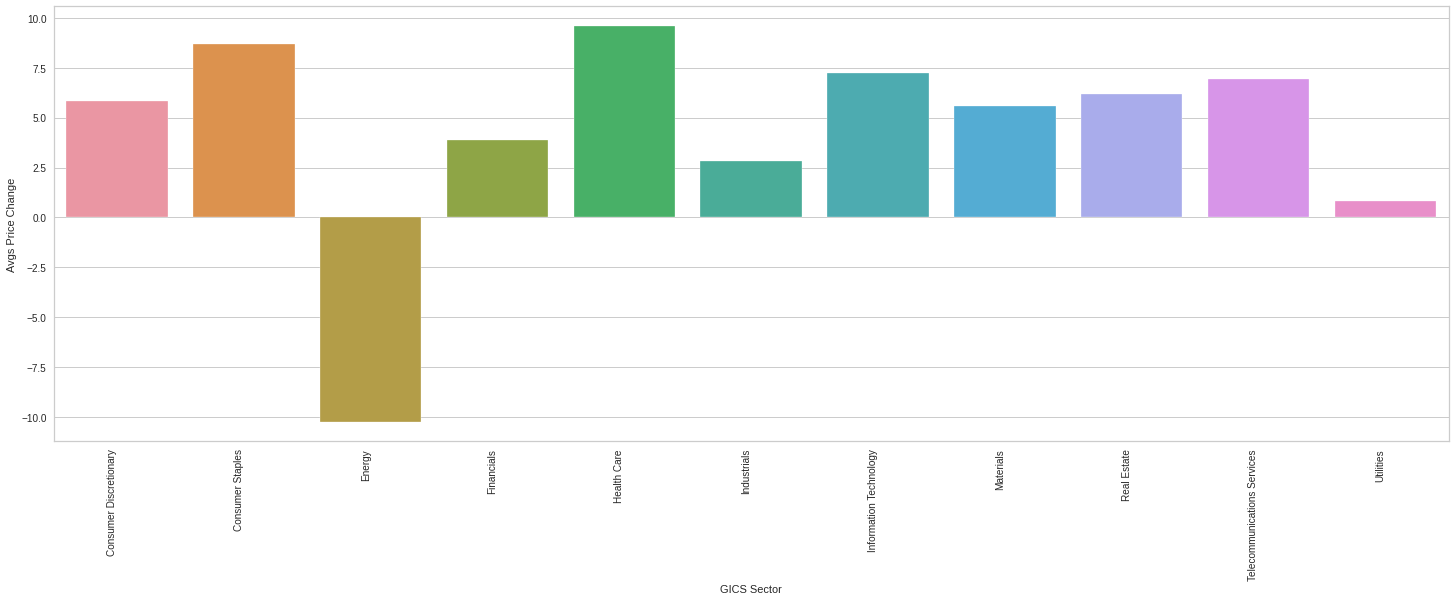

In [42]:
# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(25,8))

# Below dataframe is to group by the values and reset the index
df_ecnmcsctr_avgs_price = df.groupby('GICS Sector')['Price Change'].mean().reset_index().sort_values(by=['Price Change'], ascending=False)

# Below is to rename the columns from the dataframe newly created
df_ecnmcsctr_avgs_price.columns=['GICS Sector', 'Avgs Price Change']
print (df_ecnmcsctr_avgs_price)

# Below Barplot is used to show the values by GICS Sector and the price change
sns.barplot(data=df_ecnmcsctr_avgs_price, x='GICS Sector', y='Avgs Price Change', ci=False) 
plt.xticks(rotation= 90, ha='right');
plt.show()

####Observation

1. It is observed that Energy is performing in negative with the average price change and other GICS Sector are performing high espicially health care, customer staples and Information Technology. 

# How are the different variables correlated with each other?

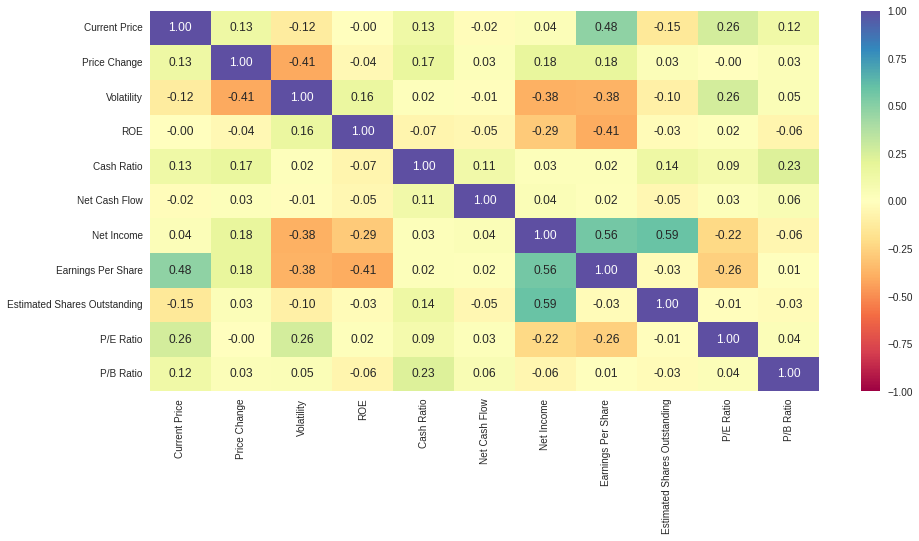

In [43]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

####Observations

1. It is observed that Volatility is negatively correlated with price change, i.e., as a stock becomes more volatile, its price is likely dropping
2. It is observed that Net income is negatively correlayed with volatility, i.e. as a company generates higher net income its price is likely less volatile
3. It is observed that Earnings Per share is positively correlated with Current Price , i.e as the Earnings Per share increases the Current Price also increase.
4. It is observed that Estimated Shares outstanding is postively correlated with Net income , i.e as the Net income increases the total market value of the comapny increases .

# Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

                    GICS Sector  Avgs Cash Ratio Value
6        Information Technology             149.818182
9   Telecommunications Services             117.000000
4                   Health Care             103.775000
3                    Financials              98.591837
1              Consumer Staples              70.947368
2                        Energy              51.133333
8                   Real Estate              50.111111
0        Consumer Discretionary              49.575000
7                     Materials              41.700000
5                   Industrials              36.188679
10                    Utilities              13.625000


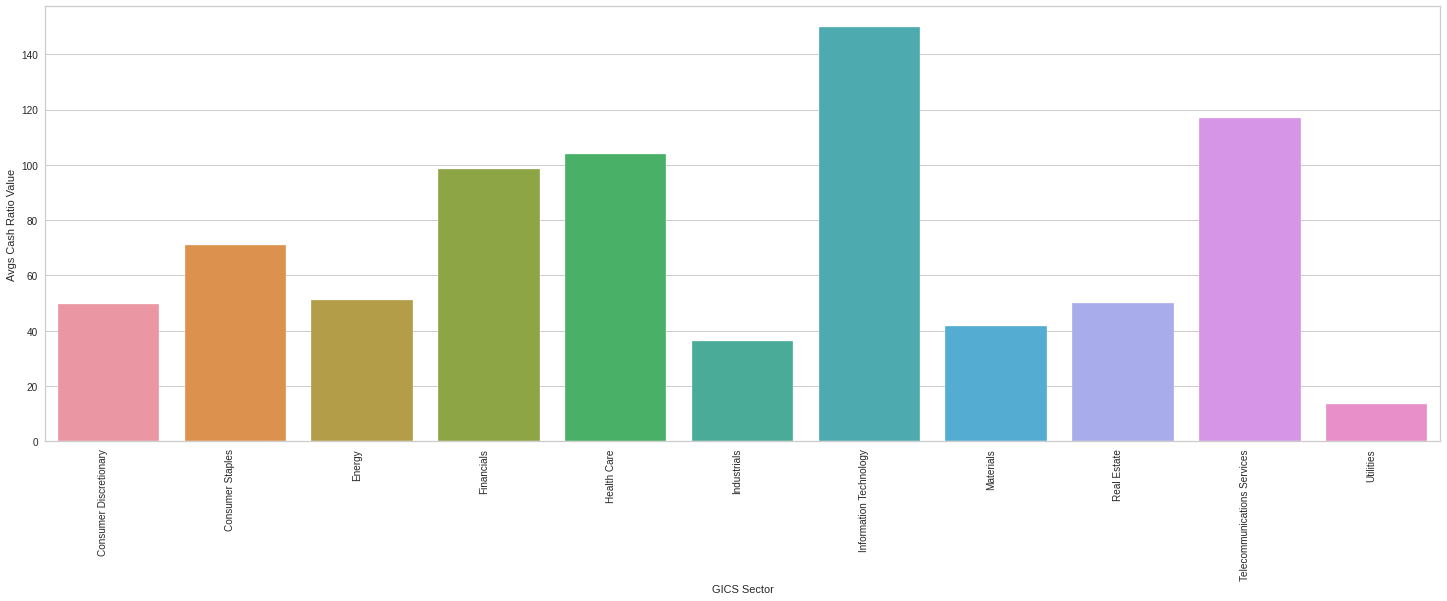

In [44]:
# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(25,8))

# Below dataframe is to group by the values and reset the index
df_ecnmcsctr_avgs_cashratio = df.groupby('GICS Sector')['Cash Ratio'].mean().reset_index().sort_values(by=['Cash Ratio'], ascending=False)

# Below is to rename the columns from the dataframe newly created
df_ecnmcsctr_avgs_cashratio.columns=['GICS Sector', 'Avgs Cash Ratio Value']
print (df_ecnmcsctr_avgs_cashratio)

# Below Barplot is used to show the values by GICS Sector and the price change
sns.barplot(data=df_ecnmcsctr_avgs_cashratio, x='GICS Sector', y='Avgs Cash Ratio Value', ci=False) 
plt.xticks(rotation= 90, ha='right');
plt.show()

####Observation 

1. It is observed that Information Technology, Telecommunication services , Healthcare, Financials and customer stapes are performing in the Top 5 with mean of the cash ratio values into consideration.

# P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

                    GICS Sector  Avgs P/E Ratio Value
2                        Energy             72.897709
6        Information Technology             43.782546
8                   Real Estate             43.065585
4                   Health Care             41.135272
0        Consumer Discretionary             35.211613
1              Consumer Staples             25.521195
7                     Materials             24.585352
10                    Utilities             18.719412
5                   Industrials             18.259380
3                    Financials             16.023151
9   Telecommunications Services             12.222578


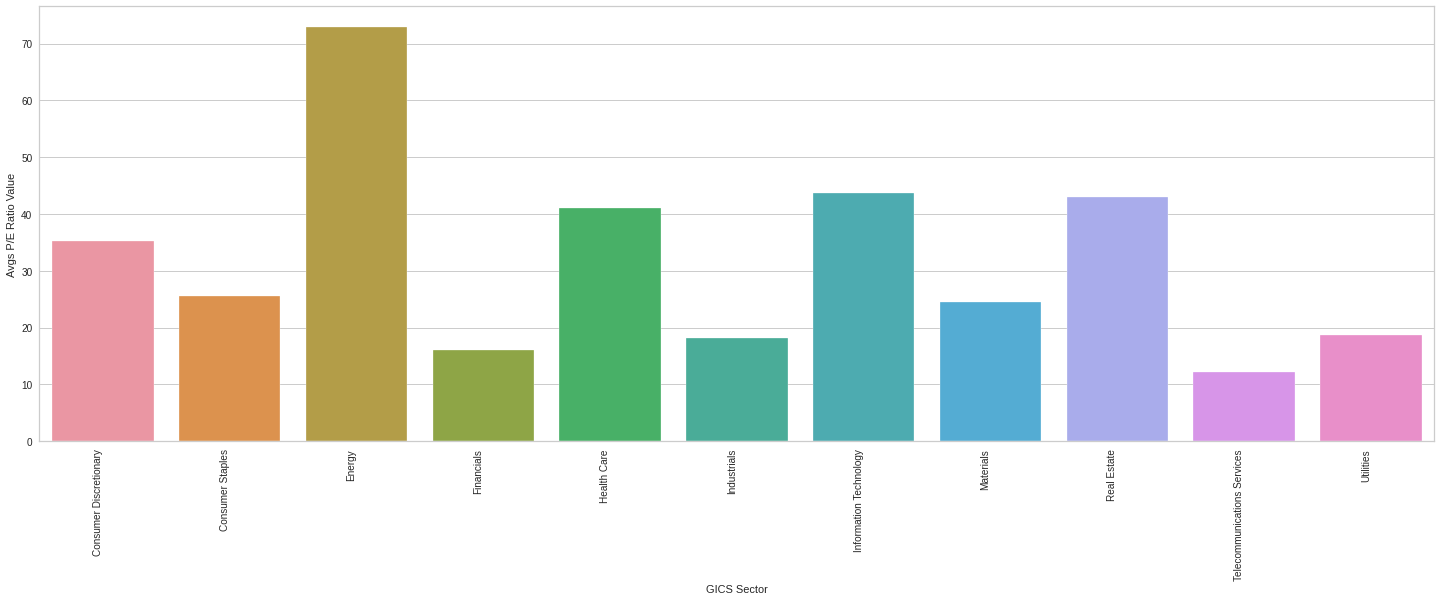

In [45]:
# Below is used to plot the figure size as per dimensions
plt.figure(figsize=(25,8))

# Below dataframe is to group by the values and reset the index
df_ecnmcsctr_avgs_peratio = df.groupby('GICS Sector')['P/E Ratio'].mean().reset_index().sort_values(by=['P/E Ratio'], ascending=False)

# Below is to rename the columns from the dataframe newly created
df_ecnmcsctr_avgs_peratio.columns=['GICS Sector', 'Avgs P/E Ratio Value']
print (df_ecnmcsctr_avgs_peratio)

# Below Barplot is used to show the values by GICS Sector and the price change
sns.barplot(data=df_ecnmcsctr_avgs_peratio, x='GICS Sector', y='Avgs P/E Ratio Value', ci=False) 
plt.xticks(rotation= 90, ha='right');
plt.show()

####Observation 

1. It is observed that Energy, Information Technology , Real Estate, Healthcare, consumer Discretionary are performing in the Top 5 with mean of the P/E ratio values into consideration.

## K-means Clustering

# Scaling of the data

In [46]:
# confirm to check the metadata for the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Ticker Symbol                 340 non-null    category
 1   Security                      340 non-null    category
 2   GICS Sector                   340 non-null    category
 3   GICS Sub Industry             340 non-null    category
 4   Current Price                 340 non-null    float64 
 5   Price Change                  340 non-null    float64 
 6   Volatility                    340 non-null    float64 
 7   ROE                           340 non-null    int64   
 8   Cash Ratio                    340 non-null    int64   
 9   Net Cash Flow                 340 non-null    int64   
 10  Net Income                    340 non-null    int64   
 11  Earnings Per Share            340 non-null    float64 
 12  Estimated Shares Outstanding  340 non-null    floa

In [47]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[['Current Price','Price Change','Volatility','ROE','Cash Ratio','Net Cash Flow','Net Income','Earnings Per Share','Estimated Shares Outstanding','P/E Ratio','P/B Ratio']].copy()  
subset_scaled = scaler.fit_transform(subset)


In [48]:
#create a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

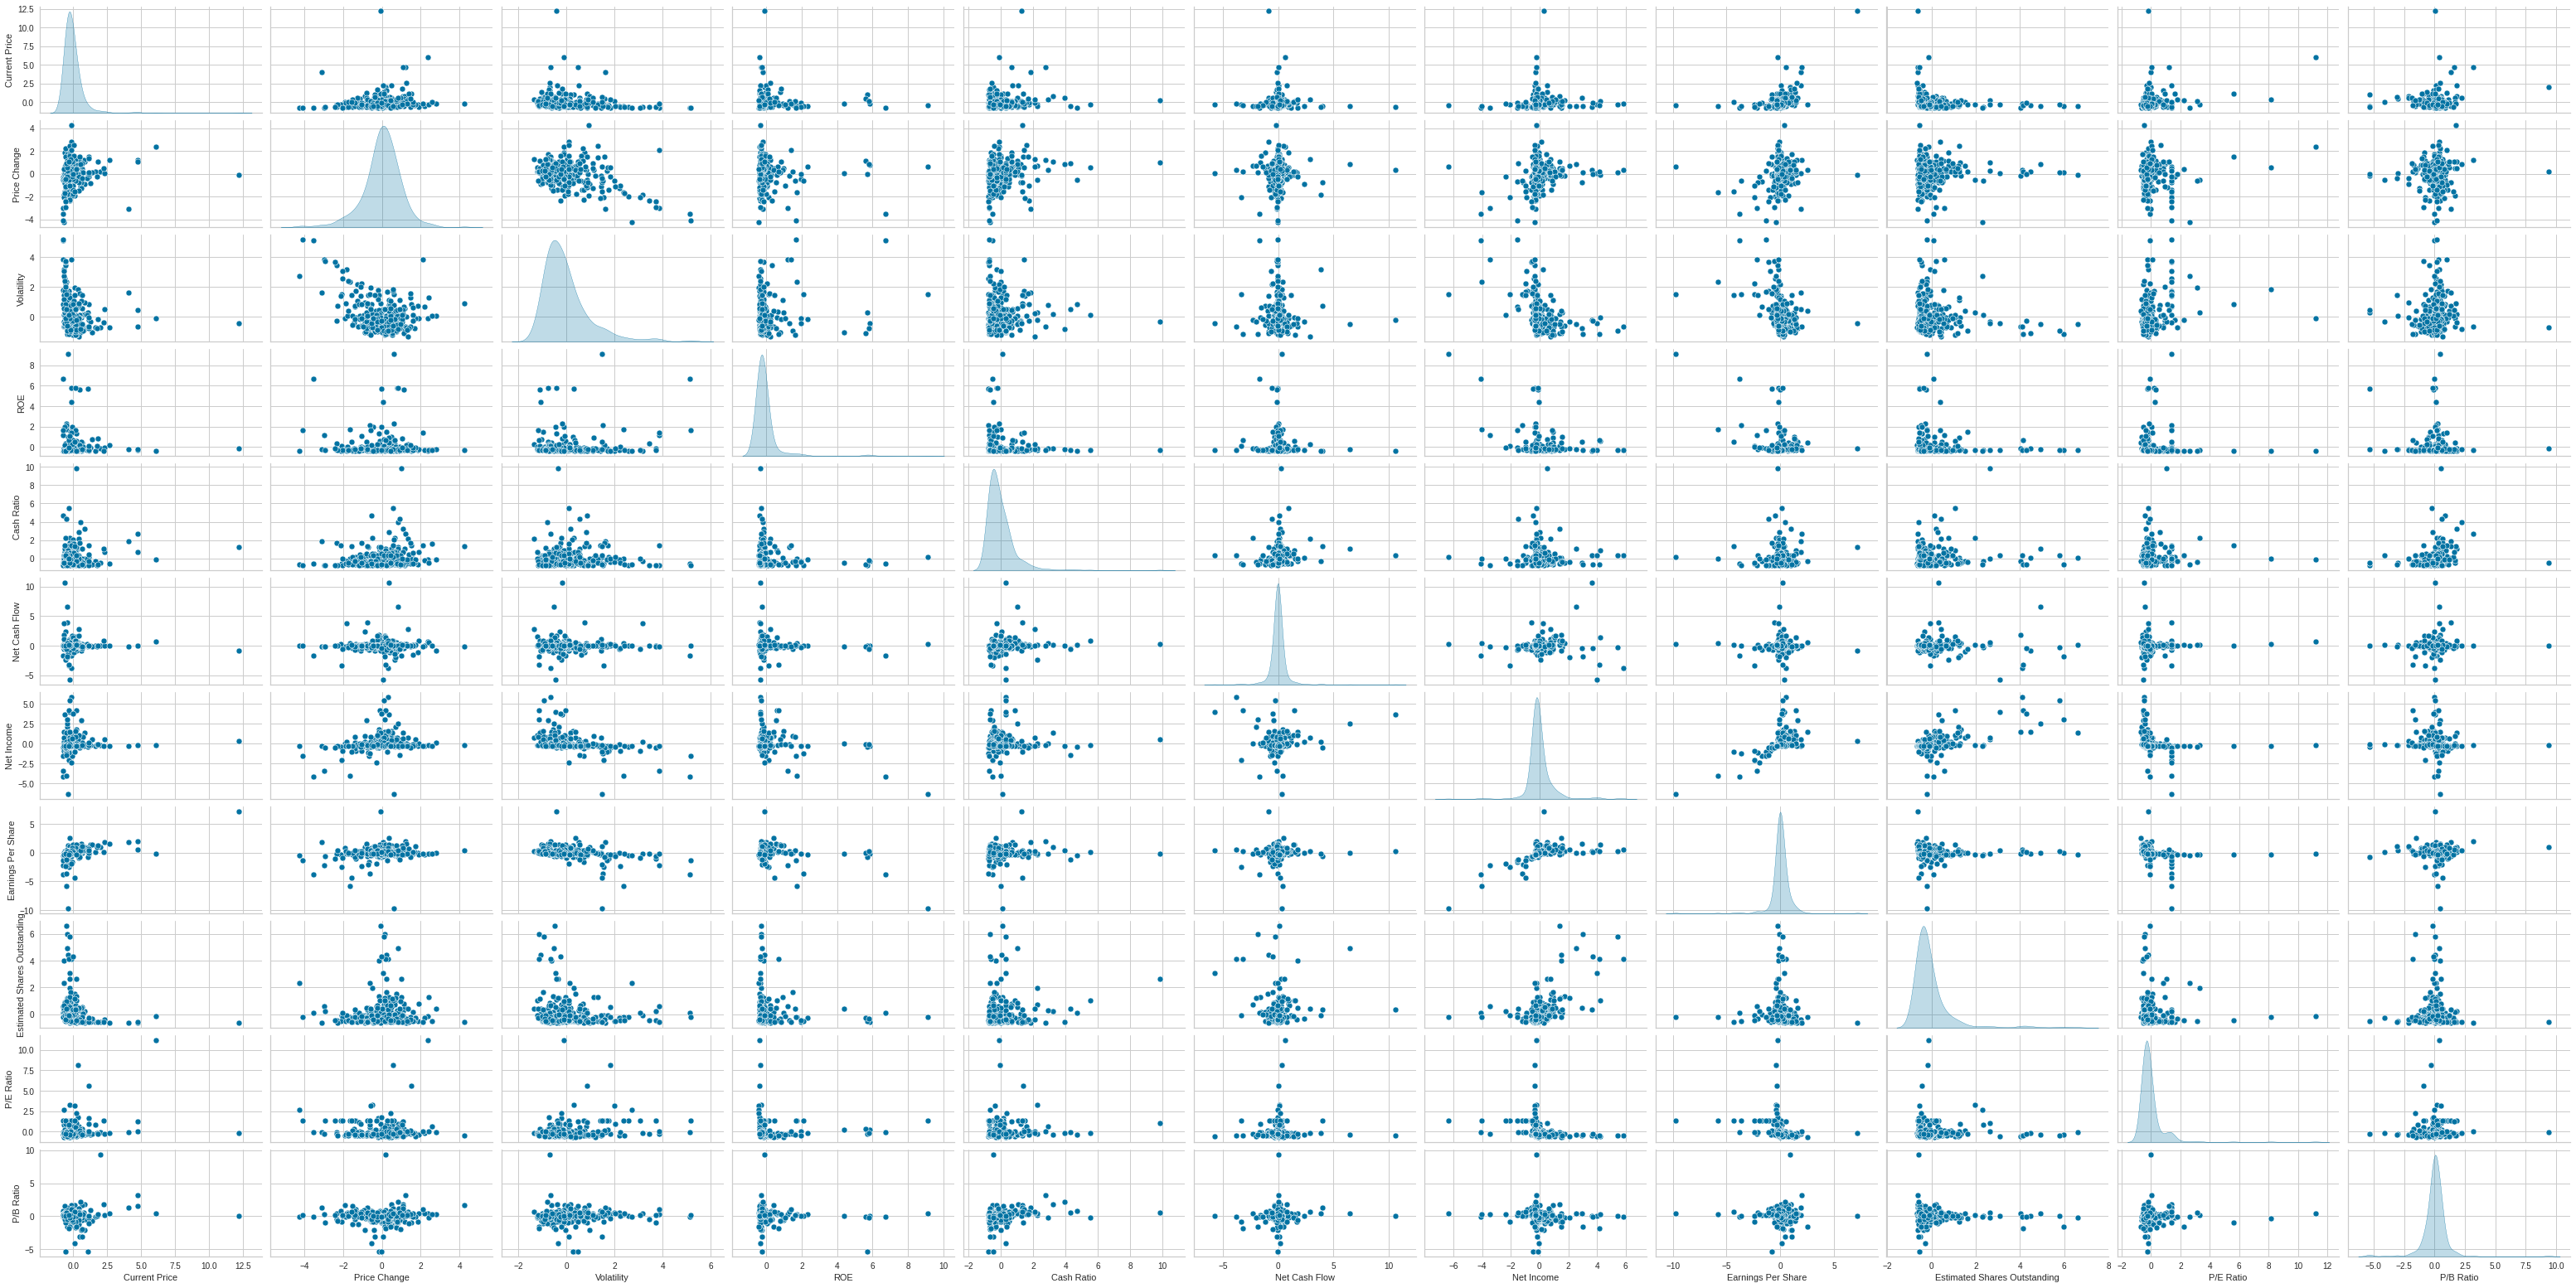

In [49]:
#create pairplot for scaled dataframe
sns.pairplot(subset_scaled_df, height=2,aspect=2 , diag_kind='kde')
plt.show()


In [50]:
#print average distortions for range of kmeans models fitted to scaled dataset
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2603612005599585
Number of Clusters: 4 	Average Distortion: 2.175666155614645
Number of Clusters: 5 	Average Distortion: 2.112457794442205
Number of Clusters: 6 	Average Distortion: 2.053350668955699
Number of Clusters: 7 	Average Distortion: 2.0412704752862463
Number of Clusters: 8 	Average Distortion: 1.9693915158679591
Number of Clusters: 9 	Average Distortion: 1.9247285037268589
Number of Clusters: 10 	Average Distortion: 1.8603109889132958
Number of Clusters: 11 	Average Distortion: 1.8238001631170917
Number of Clusters: 12 	Average Distortion: 1.7646609952208905
Number of Clusters: 13 	Average Distortion: 1.7197369767927004
Number of Clusters: 14 	Average Distortion: 1.6646089919999958


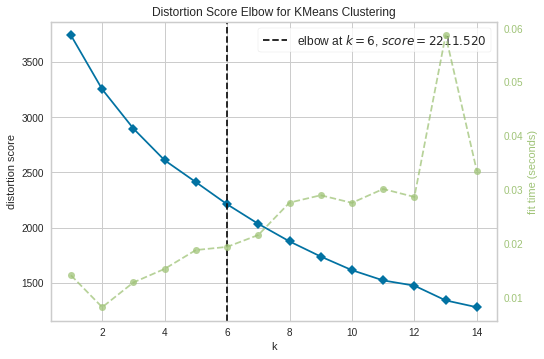

In [51]:
#fit KMeans model and use visualizer to indicate optimal K value
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure
plt.show()


For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


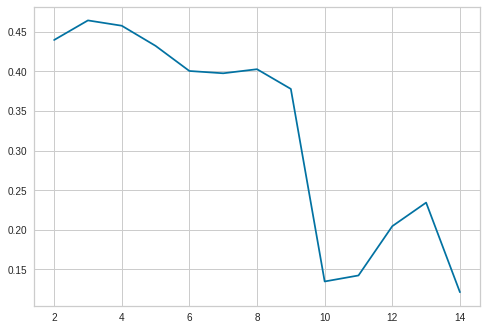

In [52]:
#fit KMeans model and provide silhouette scores for range of k clusters
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

#show scores in line graph
plt.plot(cluster_list, sil_score)
plt.show()

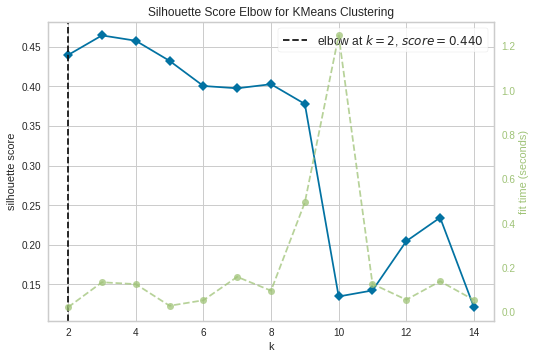

In [56]:
#fit KMeans model and use visualizer to indicate optimal K value
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(subset_scaled_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure
plt.show()

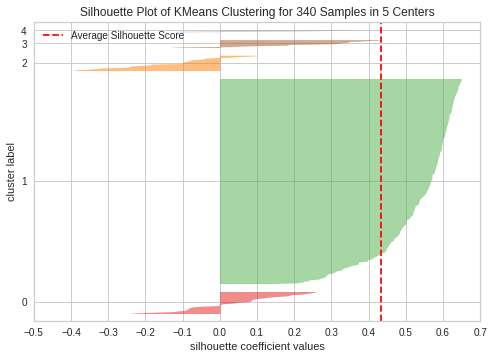

In [54]:
#find optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()
plt.show()

####Observation

1. It is observed that on validating multiple ways of performance by changing the clusters, for the elbow and the silhouette score the optimim number of cluster is 5.
2. It is observed that most of the clusters have the data points (or) observations populated above the average silhouette score.

In [57]:
#create kmeans cluster model
kmeans = KMeans(n_clusters=5, random_state=1)

#fit model to scaled dataset
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=5, random_state=1)

In [58]:
# adding kmeans cluster labels to the original dataframe
df["KMeans_clusters"] = kmeans.labels_

In [59]:
#group dataset by kmeans cluster labels
cluster_profile = df.groupby("KMeans_clusters").mean()

#add counts for number of stocks in each cluster
cluster_profile["Count"] = (
    df.groupby("KMeans_clusters")["Current Price"].count().values
)

In [59]:
cluster_profile.style.highlight_max(color="grey", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Count
KMeans_clusters,,,,,,,,,,,,
0,65.174668,-11.542247,2.690220,37.300000,65.366667,195008366.666667,-1677736033.333333,-4.401667,544473664.718000,113.488924,1.424161,30
1,72.738269,5.179897,1.380738,34.825455,53.138182,-10147287.272727,1488641570.909091,3.636164,437961614.918582,23.680917,-3.395254,275
2,233.251108,13.682869,1.719008,29.333333,296.523810,1398716380.952381,1835686380.952381,7.126190,508721791.962857,37.805996,16.758218,21
3,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
4,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3


In [60]:
# print the names of the companies in each cluster
for cl in df["KMeans_clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["KMeans_clusters"] == cl]["Security"].unique().to_list())
    print()

In cluster 1, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Allegion', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 'Caterpillar Inc.', 'Chubb Limit

In [61]:
#print number of stocks within each sector for all of the clusters
for k in range(0,df['KMeans_clusters'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(df[df['KMeans_clusters']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Energy                         21
Information Technology          4
Materials                       2
Consumer Discretionary          1
Health Care                     1
Industrials                     1
Consumer Staples                0
Financials                      0
Real Estate                     0
Telecommunications Services     0
Utilities                       0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Industrials                    52
Financials                     45
Consumer Discretionary         33
Health Care                    29
Real Estate                    26
Information Technology         24
Utilities                      24
Materials                      18
Consumer Staples               17
Energy                          5
Telecommunications Services     2
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Clu

<Axes: xlabel='KMeans_clusters'>

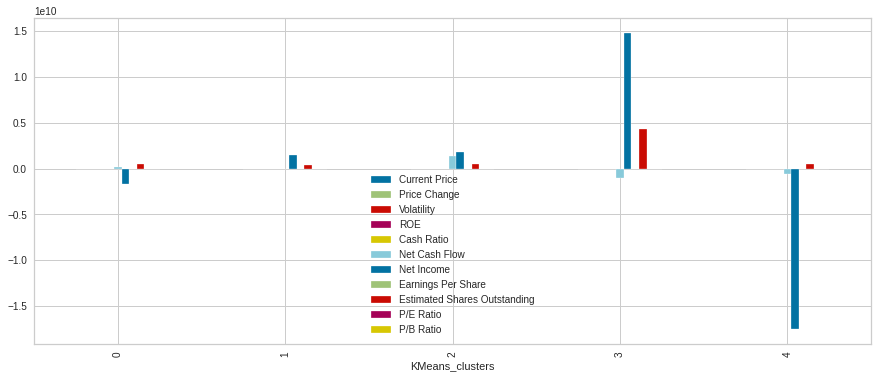

In [62]:
df.groupby("KMeans_clusters").mean().plot.bar(figsize=(15, 6))

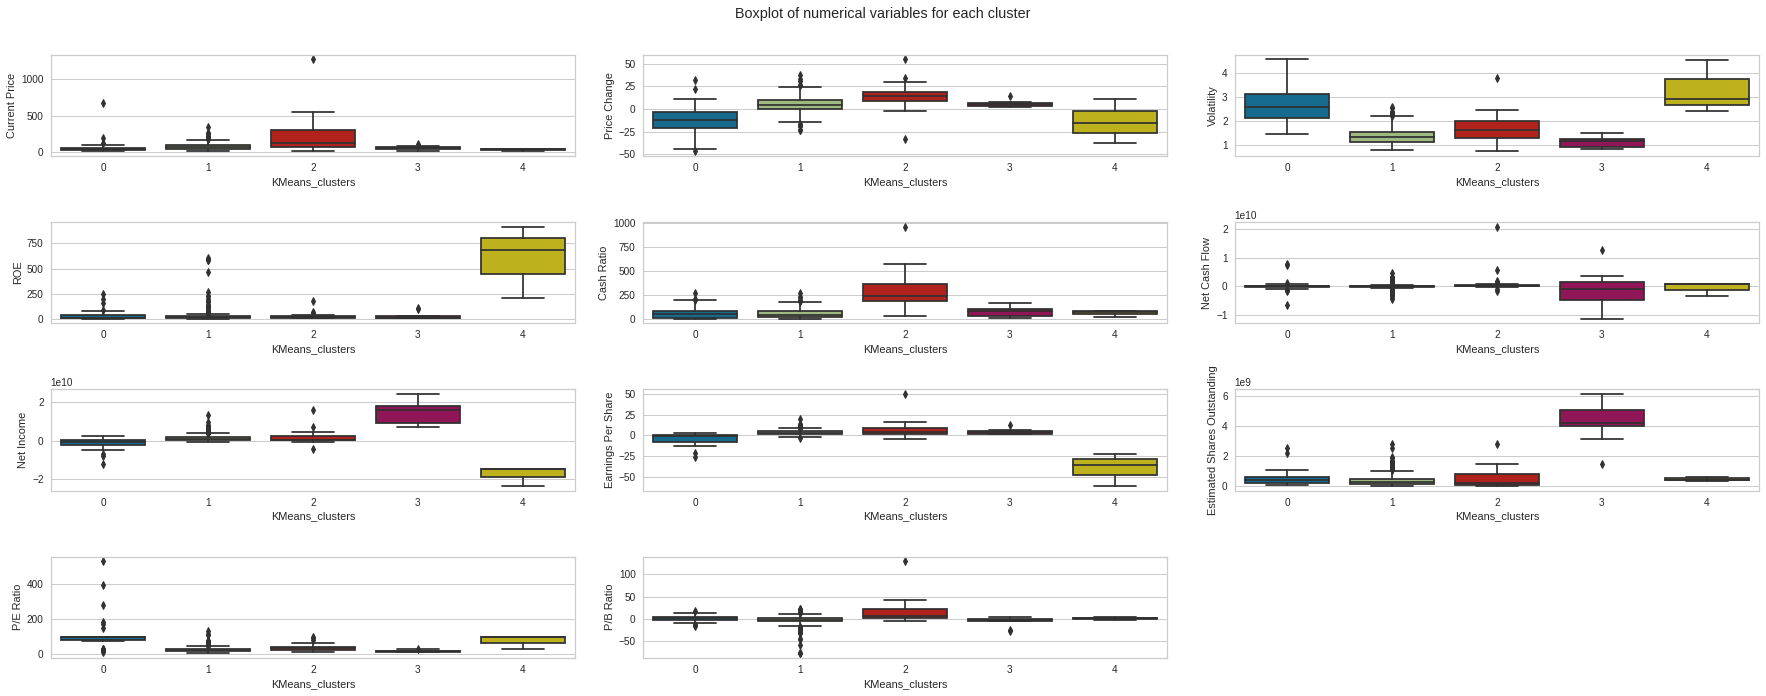

In [63]:
# show boxplots of numerical variables for each K-Means cluster
plt.figure(figsize=(25, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")
num_col = ['Current Price','Price Change','Volatility','ROE','Cash Ratio','Net Cash Flow','Net Income','Earnings Per Share','Estimated Shares Outstanding','P/E Ratio','P/B Ratio']
for i, variable in enumerate(num_col):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x="KMeans_clusters", y=variable)

plt.tight_layout(pad=2.0)


KMeans Clusters

Cluster 0 - 

30 stocks, comprised mostly of stocks within the Energy, Information Technology,
Materials,Consumer Discretionary, Health Care, Industrials Companies within this cluster have:


1.   Low volatility
2.   Most of the companies with the negative price change
3.   Negative net incomes among companies
4.   Average shares of outstanding
5.   Highest cash flow with negative earnings per share.

Cluster 1 - 

275 stocks, comprised mostly of stocks within the Industrials, Financials,Healthcare, Consumer Discretionary, Real Estate, Information Technology, Utilities, Materials, Consumer Staples, Energy and Telecommunications Services sectors within this cluster have:

1.  Low volatility
2.  Complanies with a good positive price change
3.  Negative Net Cash Flow
4.  Earnings per share is low but not negative
5.  Negative P/B Ratio 


Cluster 2 - 

21 stocks  drawn from majority of the  sectors present in the dataset
and companies within this cluster have:

1.  Very good P/E ratios
2.  Low volitality  
3.  Highest Cash reserve ratio
4.  Positive Net Income
5.  High Earnings per share and Very good P/B ratio

Cluster 3 - 

11 stocks, Companies within this cluster have:

1. Low stock prices, but very good ROE
2. Negative cash flow 
3. Very High Net Income
4. Negative Earnings per share 

Cluster 4 - 

3 stocks, comprised  from the energy sectors and companies within this cluster have:

1. All the stocks with Negative Price Change
2. Negative Net Cash Flow
3. Negative net income with highest value
4. highest negative earnings-per-share


## Hierarchical Clustering

In [64]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, round(c,4)
            )
        )
        print(" ")
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232.
 
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873.
 
Cophenetic correlation for Euclidean distance and average linkage is 0.9423.
 
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8694.
 
Cophenetic correlation for Chebyshev distance and single linkage is 0.9063.
 
Cophenetic correlation for Chebyshev distance and complete linkage is 0.5989.
 
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338.
 
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127.
 
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259.
 
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925.
 
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247.
 
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.8708.
 
Cophenetic correlation for Cityblock dist

In [65]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        round(high_cophenet_corr,4), high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9423, which is obtained with Euclidean distance and average linkage.


In [66]:
# list of linkage methods for euclidean distance metric
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print(
            "Cophenetic correlation for Euclidean distance and {} linkage is {}.".format(
                lm, round(c,4)
            )
        )
    print(" ")
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232.
 
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873.
 
Cophenetic correlation for Euclidean distance and average linkage is 0.9423.
 
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9314.
 
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101.
 
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8694.
 


In [67]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        round(high_cophenet_corr,4), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9423, which is obtained with average linkage.


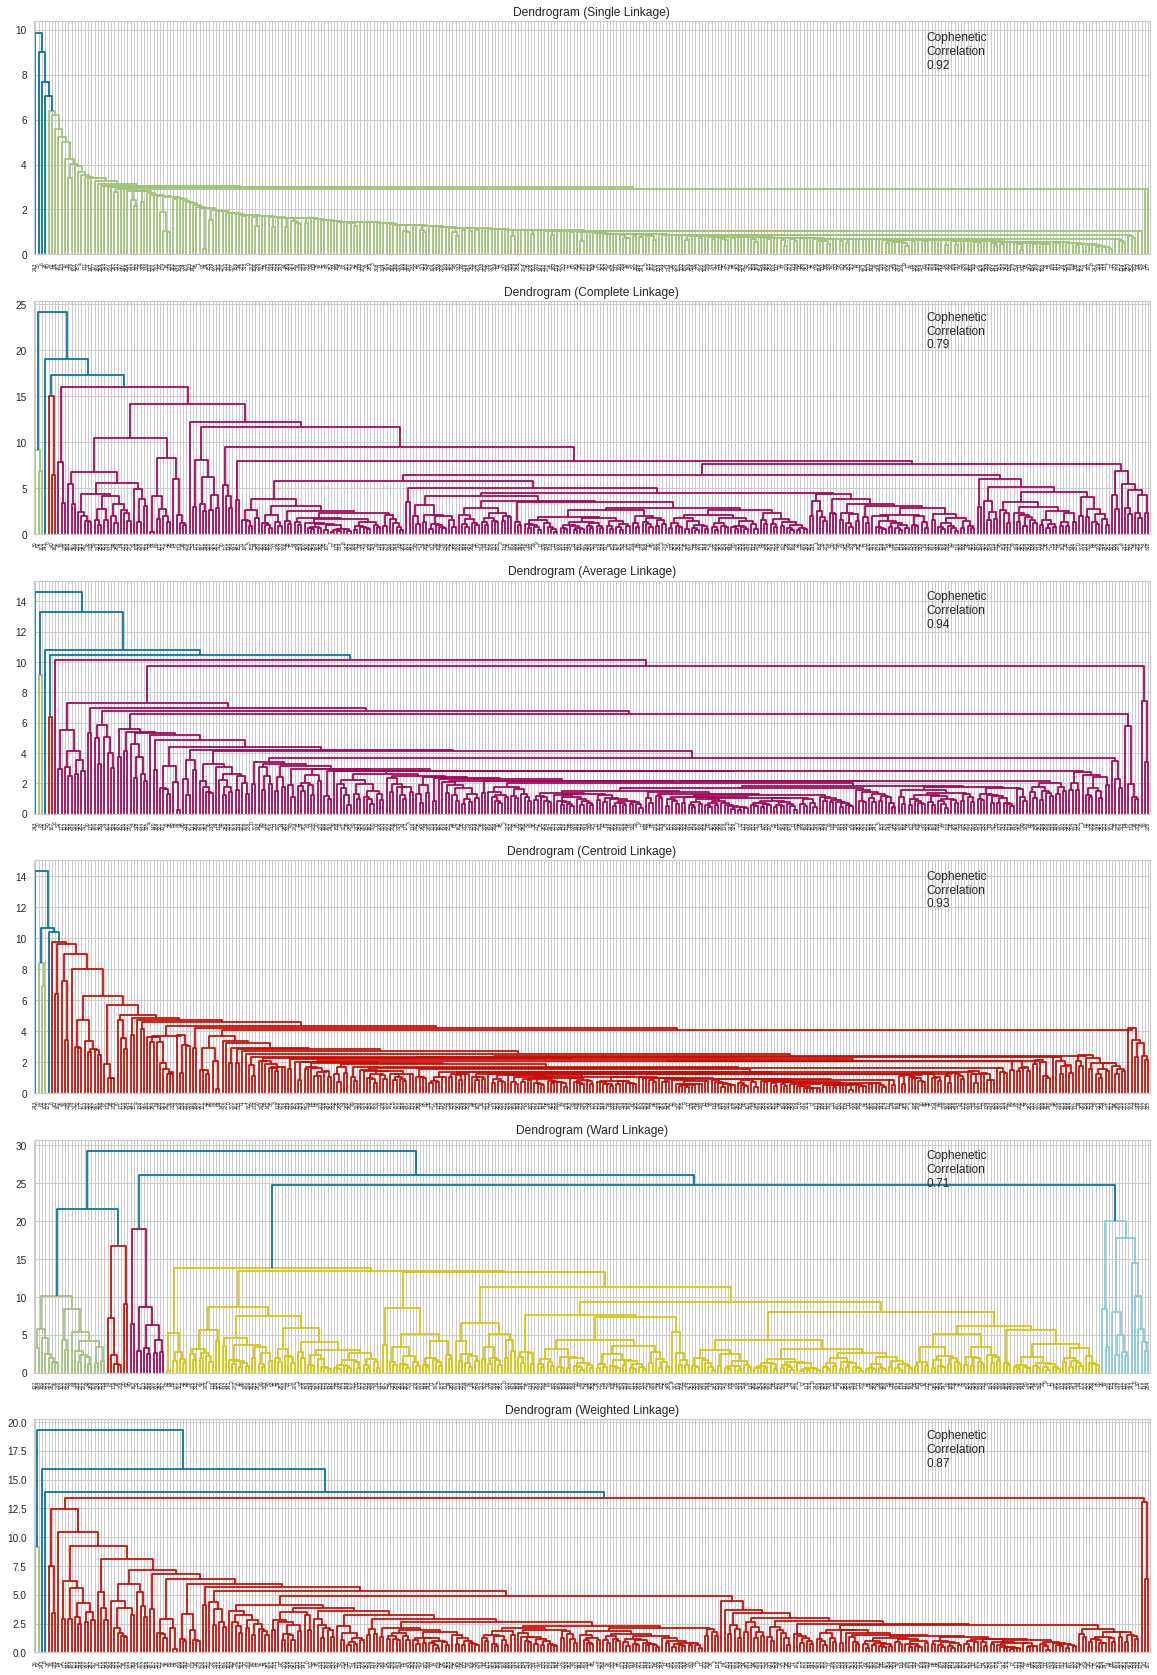

In [68]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(20, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

####Observation

1. It is observed that cophen correlation is high in centroid Linkage and average linkage.
2. It is observed that good number of clusters with variety of data segmented will be 5.

In [69]:
Z = linkage(subset_scaled_df, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(subset_scaled_df))

In [70]:
hierarchy = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
hierarchy.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [71]:
df_hrcy_clstrng_rows = df.copy()
df_hrcy_clstrng_rows.drop("KMeans_clusters", axis=1, inplace=True)
df_hrcy_clstrng_rows['HC_clusters'] = hierarchy.labels_

In [72]:
#group dataset by Hierarchical clusters
cluster_profile_h_rows = df_hrcy_clstrng_rows.groupby("HC_clusters").mean()

#add counts for number of stocks in each cluster
cluster_profile_h_rows["Count"] = (
    df_hrcy_clstrng_rows.groupby("HC_clusters")["Current Price"].count().values
)

#show dataframe with maximum values for each metric highlighted
cluster_profile_h_rows.style.highlight_max(color="grey", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Count
HC_clusters,,,,,,,,,,,,
0,77.884243,4.105986,1.516865,35.320359,66.775449,-32825817.365269,1535255703.592814,2.903308,559027333.145509,32.437511,-1.781988,334
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1


In [73]:
# print the names of the companies in each cluster
for cl in df_hrcy_clstrng_rows["HC_clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_hrcy_clstrng_rows[df_hrcy_clstrng_rows["HC_clusters"] == cl]["Security"].unique().to_list())
    print()

In cluster 0, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', 'Alliance Data Systems', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Allegion', 'Alexion Pharmaceuticals', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Amgen Inc', 'Ameriprise Financial', 'American Tower Corp A', 'Amazon.com Inc', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Anadarko Petroleum Corp', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'Baker Hughes Inc', 'BIOGEN 

####Observation

1. It is observed that in total 5 clusters, 334 companies are in the Cluster 0, 2 each in Cluster 1 & 2 , 1 each in Cluster 3 & 4.

In [74]:
# print the number of stocks in each GICS sector for each cluster
for k in range(0,df_hrcy_clstrng_rows['HC_clusters'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(df_hrcy_clstrng_rows[df_hrcy_clstrng_rows['HC_clusters']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Industrials                    53
Financials                     48
Health Care                    40
Consumer Discretionary         39
Information Technology         31
Energy                         28
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Financials                     1
Information Technology         1
Consumer Discretionary         0
Consumer Staples               0
Energy                         0
Health Care                    0
Industrials                    0
Materials                      0
Real Estate                    0
Telecommunications Services    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:

<Axes: xlabel='HC_clusters'>

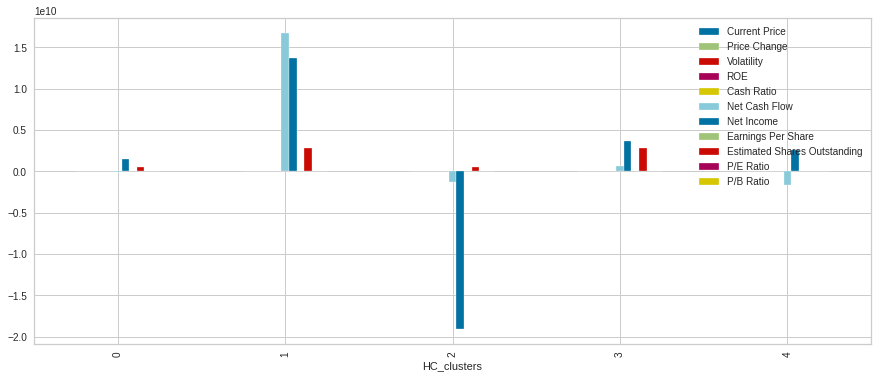

In [75]:
df_hrcy_clstrng_rows.groupby("HC_clusters").mean().plot.bar(figsize=(15, 6))

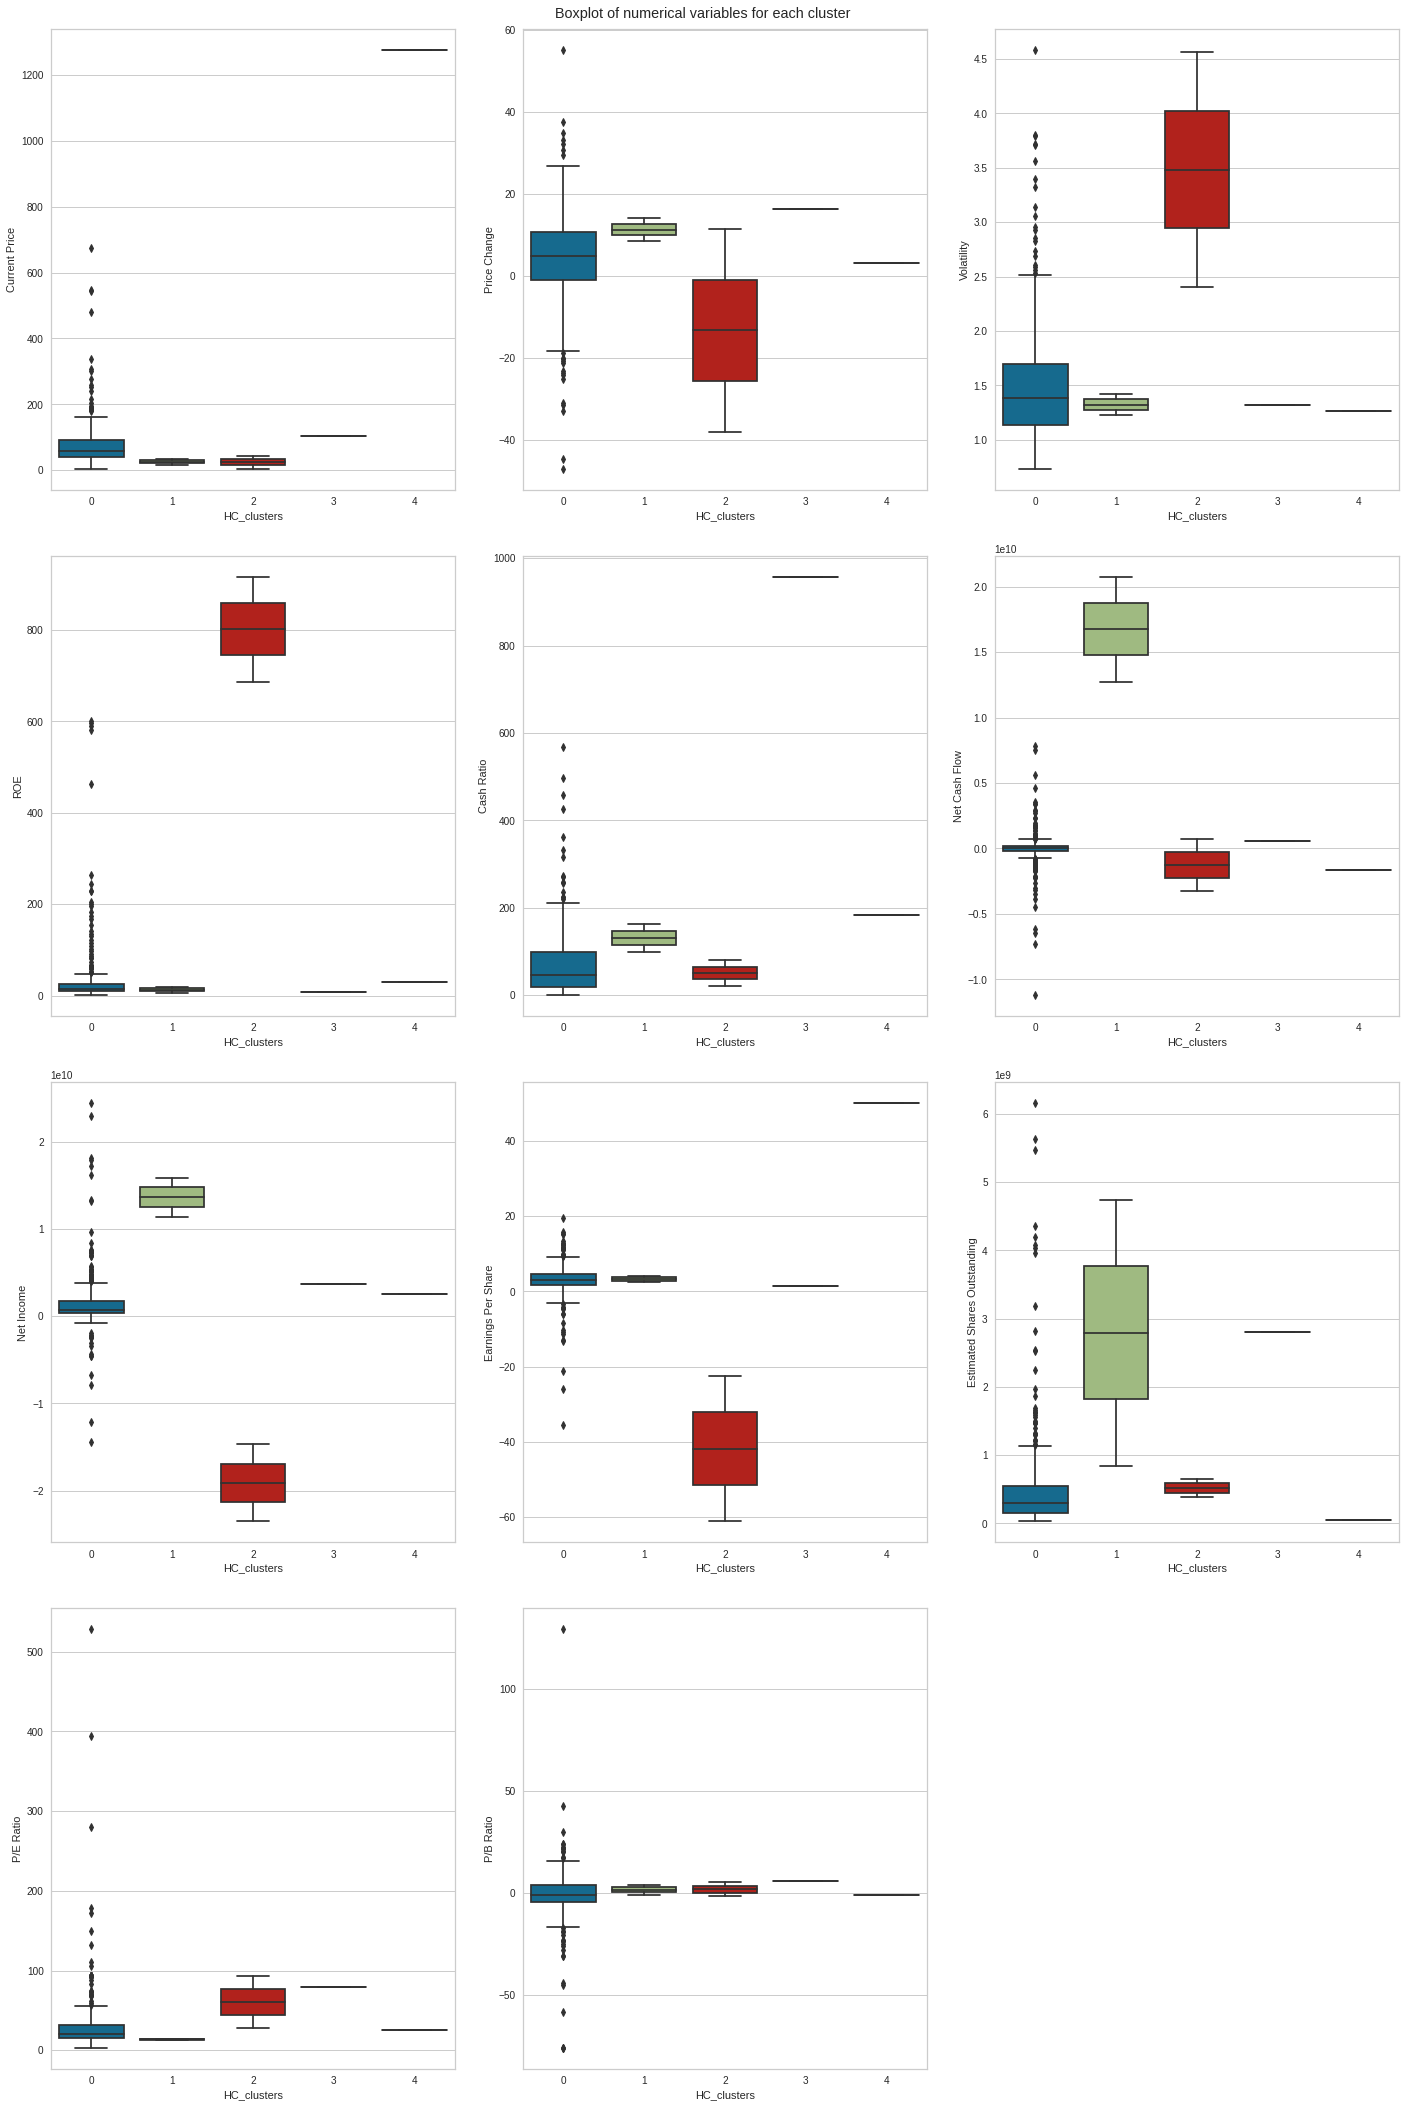

In [76]:
# show boxplots of numerical variables for each Hierarchial cluster
plt.figure(figsize=(20, 30))
plt.suptitle("Boxplot of numerical variables for each cluster")
num_col = ['Current Price','Price Change','Volatility','ROE','Cash Ratio','Net Cash Flow','Net Income','Earnings Per Share','Estimated Shares Outstanding','P/E Ratio','P/B Ratio']
for i, variable in enumerate(num_col):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_hrcy_clstrng_rows, x="HC_clusters", y=variable)

plt.tight_layout(pad=2.0)

Hierarchical Clusters

Cluster 0 - 

334 stocks, comprised within this cluster have:

1.   Low volatility
2.   Most of the companies with the positive price change
3.   Negative P/B ratio among companies
4.   Moderate ROE
5.   Negative cash flow with very low level of earnings per share.

Cluster 1 - 

2 stocks, comprised within this cluster have:

1.  Low volatility
2.  Companies with a negative  price change
3.  Negative Net Cash Flow
4.  Earnings per share is low but not negative
5.  Negative net income from the companies 


Cluster 2 - 

2 stocks comprised within this cluster have:

1.  Very good P/E ratios
2.  Low volitality  
3.  Highest Cash reserve ratio
4.  Positive Net Income
5.  High Earnings per share and Very good P/B ratio

Cluster 3 - 

1 stock, Companies within this cluster have:

1. High stock prices, but very low ROE
2. Moderate cash flow from companies
3. Very High Net Income
4. low Earnings per share
5. High P/E ratio on the stock 

Cluster 4 - 

1 stock, comprised within this cluster have:

1. stocks with Positive Price Change
2. Negative Net Cash Flow
3. net income with highest value
4. low  earnings-per-share


In [77]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [78]:
subset_scaled_df["HC_clusters"] = HCmodel.labels_
df_hrcy_clstrng_rows["HC_clusters"] = HCmodel.labels_

In [79]:
#group dataset by Hierarchical clusters
cluster_profile_h_rows = df_hrcy_clstrng_rows.groupby("HC_clusters").mean()

#add counts for number of stocks in each cluster
cluster_profile_h_rows["Count"] = (
    df_hrcy_clstrng_rows.groupby("HC_clusters")["Current Price"].count().values
)

#show dataframe with maximum values for each metric highlighted
cluster_profile_h_rows.style.highlight_max(color="grey", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Count
HC_clusters,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


In [80]:
# print the names of the companies in each cluster
for cl in df_hrcy_clstrng_rows["HC_clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_hrcy_clstrng_rows[df_hrcy_clstrng_rows["HC_clusters"] == cl]["Security"].unique().to_list())
    print()

In cluster 3, the following companies are present:
['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'BIOGEN IDEC Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston Scientific', 'BorgWarner', 'Boston Properties', 

In [81]:
# print the number of stocks in each GICS sector for each cluster
for k in range(0,df_hrcy_clstrng_rows['HC_clusters'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(df_hrcy_clstrng_rows[df_hrcy_clstrng_rows['HC_clusters']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Health Care                    5
Information Technology         4
Consumer Discretionary         3
Consumer Staples               1
Real Estate                    1
Telecommunications Services    1
Energy                         0
Financials                     0
Industrials                    0
Materials                      0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Consumer Staples               2
Energy                         2
Consumer Discretionary         1
Financials                     1
Industrials                    1
Health Care                    0
Information Technology         0
Materials                      0
Real Estate                    0
Telecommunications Services    0
Utilities                      0
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:
Financials

<Axes: xlabel='HC_clusters'>

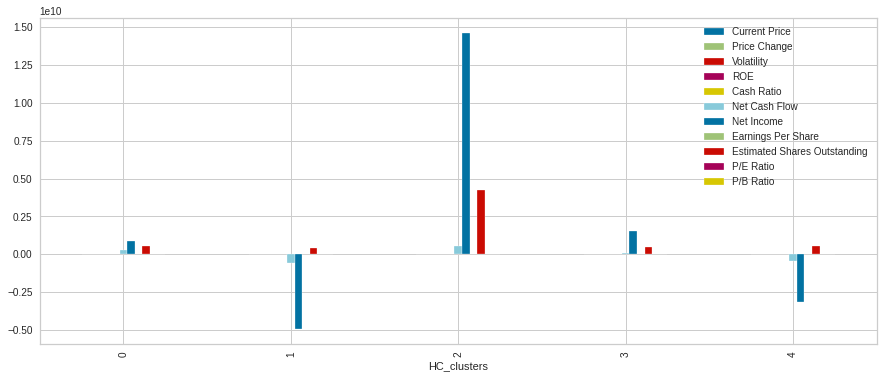

In [82]:
df_hrcy_clstrng_rows.groupby("HC_clusters").mean().plot.bar(figsize=(15, 6))

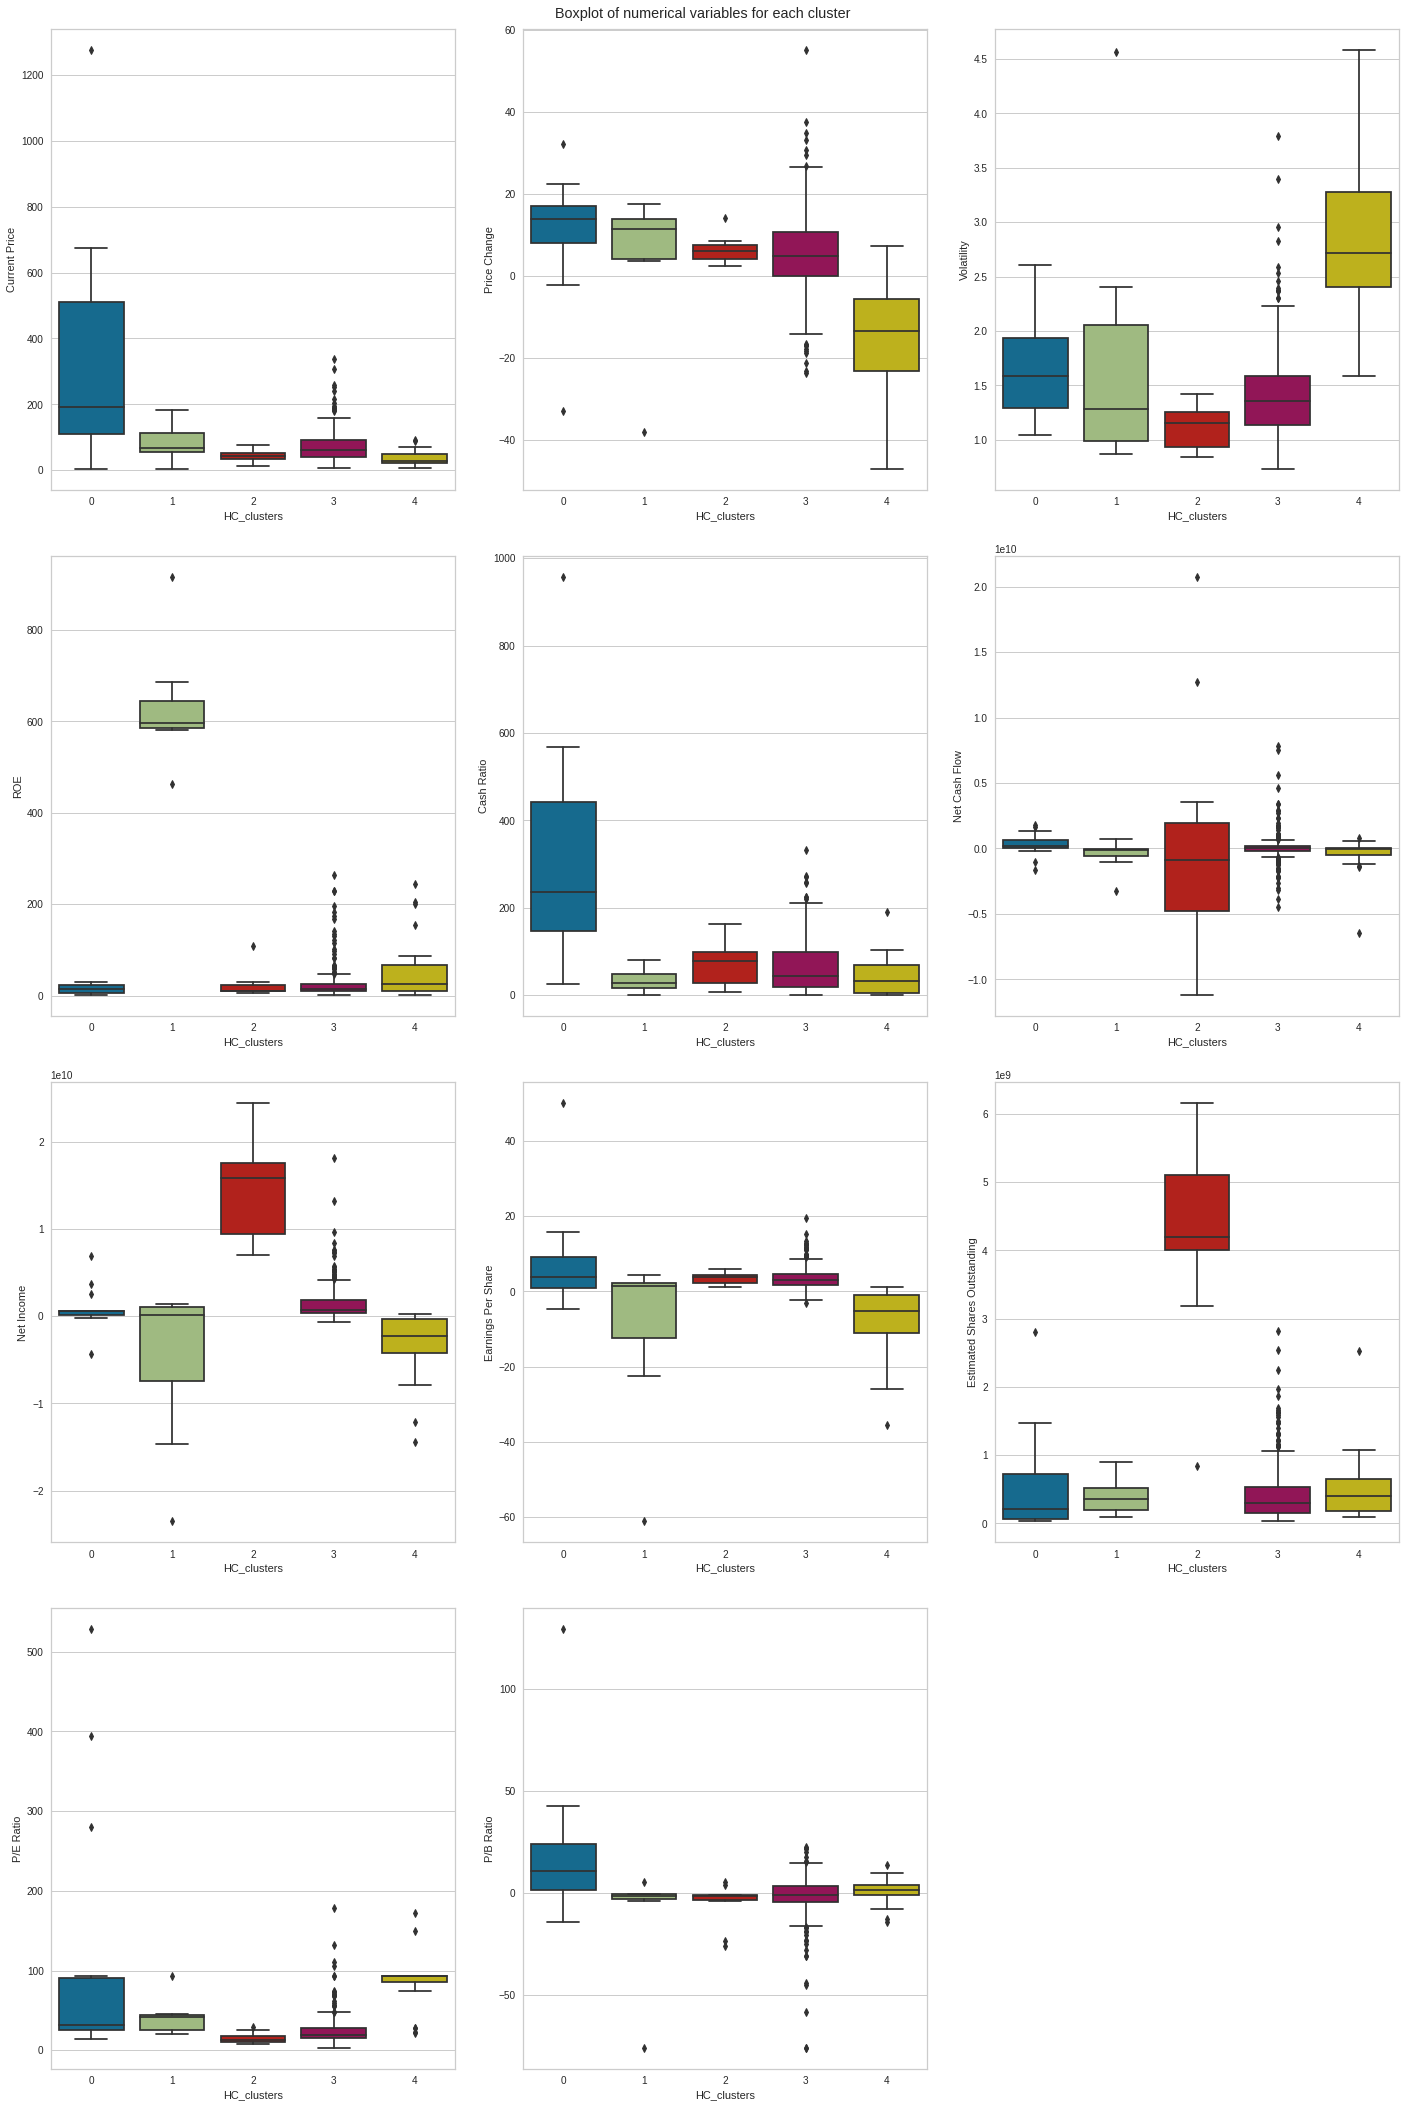

In [83]:
# show boxplots of numerical variables for each Hierarchial cluster
plt.figure(figsize=(20, 30))
plt.suptitle("Boxplot of numerical variables for each cluster")
num_col = ['Current Price','Price Change','Volatility','ROE','Cash Ratio','Net Cash Flow','Net Income','Earnings Per Share','Estimated Shares Outstanding','P/E Ratio','P/B Ratio']
for i, variable in enumerate(num_col):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_hrcy_clstrng_rows, x="HC_clusters", y=variable)

plt.tight_layout(pad=2.0)

Hierarchical Clusters

Cluster 0 - 

15 stocks, comprised Companies within this cluster have:

1.   Most of stocks with the highest prices
2.   High price-to-book (P/B) ratios
3.   Having  highest cash ratios
4.   Good earnings per share
5.   Ver low volatility on the stocks

Cluster 1 - 

7 stocks, comprised  Companies within this cluster have:

1.  The highest returns-on-equity
2.  The lowest net incomes
3.  negative earnings per share
4.  negative P/E ratio of the stocks


Cluster 2 - 

11 stocks, comprised Companies within this cluster have:

1.   Most of the companies with the highest inflows and outflows of cash
2.   The highest net incomes
3.   The highest number of shares outstanding


Cluster 3 - 

285 stocks Companies within this cluster have:

1.   Most of outliers in price increases and some of the outliers in price decreases
2.   Some of outliers in cash inflows and outflows
3.   Most of the outliers in P/B ratio


Cluster 4 - 

22 stocks, Companies within this cluster have:


1.   Most of the most volatile stocks, especially those with outliers in price decreases
2.   Mostly negative net incomes and 
3.   Negative earnings per share
4.   Negative net cash flow 

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

- Which clustering technique took less time for execution?




It is observed that both the  K Means and the agglomerative clustering took less than 0.2 sec







- Which clustering technique gave you more distinct clusters, or are they the same?

It is observed that both the clustering techniques give you similar clusters, with one cluster with high amount of companies and other clusters with small amount of companies.

- How many observations are there in the similar clusters of both algorithms?

In similar clusters of both algorithms, we have approximately 2-30 .

- How many clusters are obtained as the appropriate number of clusters from both algorithms?

In both algorithms the appropriate number of cluster obtained are around 5-6.

## Actionable Insights and Recommendations

- 

## Actionable Insights

1. It is observed that average price change is moderate in the 

  *   Health Care
  *   Consumer Staples
  *   Information Technology
  *   Telecommunications


2. It is observed that average price change is negative in the energy sector.
3. It is observed that average cash ratio value is high in the Information Technology, Telecommunications, Health Care and Financials.
4. It is observed that average P/E Ratio is high in the Energy ,Information Technology,real estate , Health Care and Consumer Discretionary which is basically as an investor we are paying high to earn the share.
5. It is observed that Energy sector companies like 
  * 'Apache Corporation', 
  * 'Chesapeake Energy', 
  * 'Devon Energy Corp.' have high price change and negative earnings per share.
6. It is observed that , companies related to the Health Care , Information Technology, Financials, Telecommunications, Real estate have low volatality, High Cash Ratio, high net income , but moderate earnings per share .
7. Extending Point #6, it is observed that the P/B ratio is also high .
8. It is observed that high number of energy companies contribute to the negative price change and the earnings per share, P/B ratio is also not positive.
9. It is observed that companies like 
  *    Alliance Data Systems
  *    Amgen Inc
  *    Chipotle Mexican Grill
  *    Equinix
  *    Facebook
  *    Frontier Communications
  *    Monster Beverage
  *    Regeneron
  *    Yahoo Inc
  *    Waters Corporation
  *    Priceline.com Inc 
    have very high current price and less volatality.
10. Extending Point#9, these companies have very good cash flow and the Earnings per Share is also moderate.

## Recommendations

1. It is observed that Energy related companies have high negative earning per share, investors need to careful reconsider while investing in this sector.
2. It is observed that companies like Facebook, Yahoo, Equinix , Alliance Data systems , Chipotle Mexican Grill have been consistent in the price  change and have very high price in current market.
3. It is also observed that these comapnies have high cash flow and very good Earning per share which makes these comapnies consistent .
4. Considering, the below parameters 
   * Current price , 
   * volatlity of the share/stock per company , 
   * Earning per share, 
   * Net cash income, 
   * P/B ratio 
   
    makes it easy to classify either to have a BUY or SELL component for the respective stock.
5. Trade&Ahead should first identify the financial goals, risk tolerance, and investment behaviors of their clilents, then recommend a cluster as a potential portfolio of stocks which will fit their needs